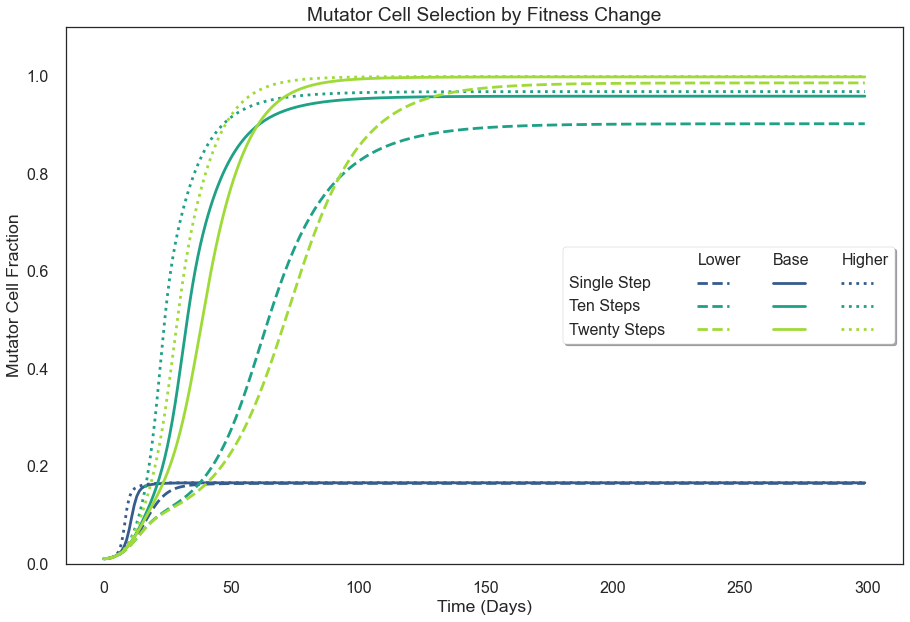

In [13]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle 
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.io import loadmat
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import integrate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# fitness
df2_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.0_08_29_202219_11_57/single_step.csv')
df10_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.0_08_29_202219_11_57/ten_steps.csv')
df20_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.0_08_29_202219_11_57/twenty_steps.csv')

df2_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_0.5_08_29_202219_11_36/single_step.csv')
df10_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_0.5_08_29_202219_11_36/ten_steps.csv')
df20_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_0.5_08_29_202219_11_36/twenty_steps.csv')

df2_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.5_08_29_202219_11_08/single_step.csv')
df10_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.5_08_29_202219_11_08/ten_steps.csv')
df20_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_fit_1.5_08_29_202219_11_08/twenty_steps.csv')

mut_df = pd.DataFrame()
mut_df['Time'] = df2_base['Time']
mut_df['1 Base'] = df2_base['Mutator Fraction']
mut_df['1 Lower'] = df2_lower['Mutator Fraction']
mut_df['1 Higher'] = df2_higher['Mutator Fraction']
mut_df['10 Base'] = df10_base['Mutator Fraction']
mut_df['10 Lower'] = df10_lower['Mutator Fraction']
mut_df['10 Higher'] = df10_higher['Mutator Fraction']
mut_df['20 Base'] = df20_base['Mutator Fraction']
mut_df['20 Lower'] = df20_lower['Mutator Fraction']
mut_df['20 Higher'] = df20_higher['Mutator Fraction']
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
sns.lineplot(x="Time", y="1 Lower", data=mut_df, label='1 Lower Fitness', color = '#365c8d', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="1 Base", data=mut_df, label='1 Base Fitness', color = '#365c8d')#.set_yscale("symlog")
sns.lineplot(x="Time", y="1 Higher", data=mut_df, label='1 Higher Fitness', color = '#365c8d', linestyle="dotted")#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Lower", data=mut_df, label='10 Lower Fitness', color = '#1fa187', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Base", data=mut_df, label='10 Base Fitness', color = '#1fa187')#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Higher", data=mut_df, label='10 Higher Fitness', color = '#1fa187', linestyle="dotted")#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Lower", data=mut_df, label='20 Lower Fitness', color = '#a0da39', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Base", data=mut_df, label='20 Base Fitness', color = '#a0da39')#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Higher", data=mut_df, label='20 Higher Fitness', color = '#a0da39', linestyle="dotted")#.set_yscale("symlog")
ds = [0]
p1, = plt.plot(ds, label='Single Step', linestyle= 'dashed', color = '#365c8d')
p2, = plt.plot(ds, label='Ten Steps', linestyle = 'dashed', color='#1fa187')
p3, = plt.plot(ds, label='Twenty Steps', linestyle = 'dashed', color='#a0da39')
p4, = plt.plot(ds, label='Single Step', linestyle= 'solid', color = '#365c8d')
p5, = plt.plot(ds, label='Ten Steps', linestyle = 'solid', color='#1fa187')
p6, = plt.plot(ds, label='Twenty Steps', linestyle = 'solid', color='#a0da39')
p7, = plt.plot(ds, label='Single Step', linestyle= 'dotted', color = '#365c8d')
p8, = plt.plot(ds, label='Ten Steps', linestyle = 'dotted', color='#1fa187')
p9, = plt.plot(ds, label='Twenty Steps', linestyle = 'dotted', color='#a0da39')
p10, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
# create blank rectangle
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)           
legend_handle = [extra, extra, extra, extra, extra,p1, p2, p3, p10, p4, p5, p6, p10, p7, p8, p9 ]
#Define the labels
label_row_1 = ['', 'Single Step', 'Ten Steps', 'Twenty Steps']
label_j_1 = ['Lower']
label_j_2 = ['Base']
label_j_3 = ['Higher']
label_empty = [""]

#organize labels for table construction
legend_labels = np.concatenate([label_row_1, label_j_1, label_empty * 3, label_j_2, label_empty * 3, label_j_3, label_empty * 3])
plt.legend(legend_handle, legend_labels, 
          loc = 'best', ncol = 4, shadow = True, handletextpad = -2)
plt.xlabel('Time (Days)') # X axis data label
plt.ylabel('Mutator Cell Fraction') # Y axis data label
plt.ylim([0, 1.1])
plt.title('Mutator Cell Selection by Fitness Change')
plt.savefig('revised_fitness.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [95]:
pal = sns.color_palette('viridis', n_colors = 6)
pal.as_hex()           

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']

In [96]:
print(pal.as_hex()) 

['#46327e', '#365c8d', '#277f8e', '#1fa187', '#4ac16d', '#a0da39']


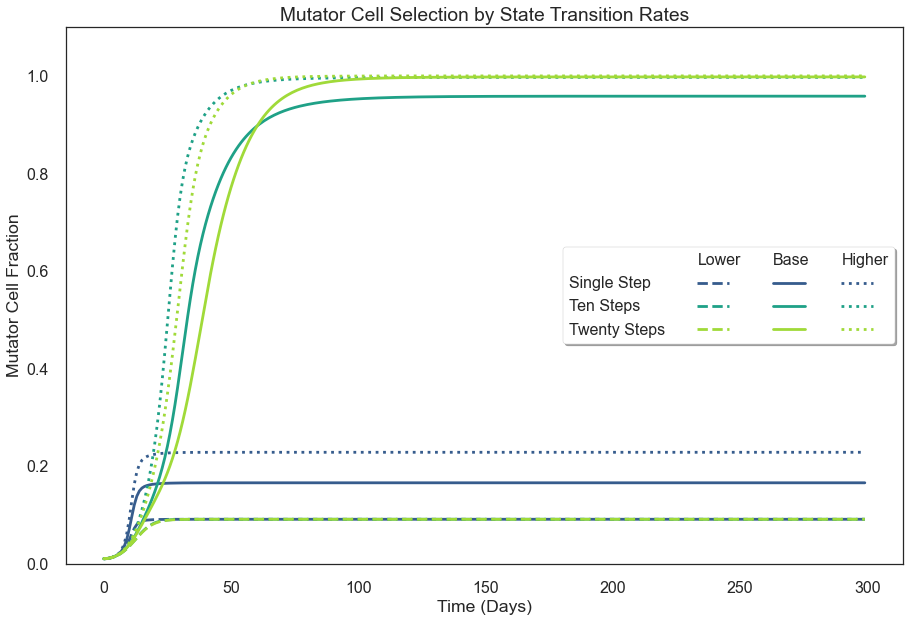

In [14]:
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D 
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.io import loadmat
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import integrate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#
df2_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_2.0_08_29_202219_13_30/single_step.csv')
df10_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_2.0_08_29_202219_13_30/ten_steps.csv')
df20_base = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_2.0_08_29_202219_13_30/twenty_steps.csv')

df2_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_1.0_08_29_202219_14_14/single_step.csv')
df10_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_1.0_08_29_202219_14_14/ten_steps.csv')
df20_lower = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_1.0_08_29_202219_14_14/twenty_steps.csv')

df2_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_3.0_08_29_202219_14_46/single_step.csv')
df10_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_3.0_08_29_202219_14_46/ten_steps.csv')
df20_higher = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_add_3.0_08_29_202219_14_46/twenty_steps.csv')

mut_df = pd.DataFrame()
mut_df['Time'] = df2_base['Time']
mut_df['1 Base'] = df2_base['Mutator Fraction']
mut_df['1 Lower'] = df2_lower['Mutator Fraction']
mut_df['1 Higher'] = df2_higher['Mutator Fraction']
mut_df['10 Base'] = df10_base['Mutator Fraction']
mut_df['10 Lower'] = df10_lower['Mutator Fraction']
mut_df['10 Higher'] = df10_higher['Mutator Fraction']
mut_df['20 Base'] = df20_base['Mutator Fraction']
mut_df['20 Lower'] = df20_lower['Mutator Fraction']
mut_df['20 Higher'] = df20_higher['Mutator Fraction']
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
sns.lineplot(x="Time", y="1 Lower", data=mut_df, label='1 1-Fold', color = '#365c8d', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="1 Base", data=mut_df, label='1 2-Fold', color = '#365c8d')#.set_yscale("symlog")
sns.lineplot(x="Time", y="1 Higher", data=mut_df, label='1 3-Fold', color = '#365c8d', linestyle="dotted")#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Lower", data=mut_df, label='10 1-Fold', color = '#1fa187', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Base", data=mut_df, label='10 2-Fold', color = '#1fa187')#.set_yscale("symlog")
sns.lineplot(x="Time", y="10 Higher", data=mut_df, label='10 3-Fold', color = '#1fa187', linestyle="dotted")#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Lower", data=mut_df, label='20 No 1-Fold', color = '#a0da39', linestyle="dashed")#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Base", data=mut_df, label='20 2-Fold', color = '#a0da39')#.set_yscale("symlog")
sns.lineplot(x="Time", y="20 Higher", data=mut_df, label='20 3-Fold', color = '#a0da39', linestyle="dotted")#.set_yscale("symlog")
ds = [0]
p1, = plt.plot(ds, label='Single Step', linestyle= 'dashed', color = '#365c8d')
p2, = plt.plot(ds, label='Ten Steps', linestyle = 'dashed', color='#1fa187')
p3, = plt.plot(ds, label='Twenty Steps', linestyle = 'dashed', color='#a0da39')
p4, = plt.plot(ds, label='Single Step', linestyle= 'solid', color = '#365c8d')
p5, = plt.plot(ds, label='Ten Steps', linestyle = 'solid', color='#1fa187')
p6, = plt.plot(ds, label='Twenty Steps', linestyle = 'solid', color='#a0da39')
p7, = plt.plot(ds, label='Single Step', linestyle= 'dotted', color = '#365c8d')
p8, = plt.plot(ds, label='Ten Steps', linestyle = 'dotted', color='#1fa187')
p9, = plt.plot(ds, label='Twenty Steps', linestyle = 'dotted', color='#a0da39')
p10, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
# create blank rectangle
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)           
legend_handle = [extra, extra, extra, extra, extra,p1, p2, p3, p10, p4, p5, p6, p10, p7, p8, p9 ]
#Define the labels
label_row_1 = ['', 'Single Step', 'Ten Steps', 'Twenty Steps']
label_j_1 = ['Lower']
label_j_2 = ['Base']
label_j_3 = ['Higher']
label_empty = [""]

#organize labels for table construction
legend_labels = np.concatenate([label_row_1, label_j_1, label_empty * 3, label_j_2, label_empty * 3, label_j_3, label_empty * 3])
plt.legend(legend_handle, legend_labels, 
          loc = 'best', ncol = 4, shadow = True, handletextpad = -2)
plt.xlabel('Time (Days)') # X axis data label
plt.ylabel('Mutator Cell Fraction') # Y axis data label
plt.ylim([0, 1.1])
plt.title('Mutator Cell Selection by State Transition Rates')
plt.savefig('revised_mutator.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
# steady state and mutator selection
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.io import loadmat
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import integrate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy import *
df_initial = []
df_time = []
df_mut = []
df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_07_18_202223_32_33/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_20_per_1_mut_ad_2_08_24_202210_28_30/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_30_per_1_mut_ad_2_08_24_202210_28_57/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_40_per_1_mut_ad_2_08_24_202210_29_24/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_50_per_1_mut_ad_2_08_24_202210_29_45/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_60_per_1_mut_ad_2_08_24_202210_30_34/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_70_per_1_mut_ad_2_08_24_202210_31_00/twenty_steps.csv').clip(lower=1).fillna(0)

for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_80_per_1_mut_ad_2_08_24_202210_31_20/twenty_steps.csv').clip(lower=1).fillna(0)

for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_90_per_1_mut_ad_2_08_24_202210_31_43/twenty_steps.csv').clip(lower=1).fillna(0)

for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/twenty_steps.csv').clip(lower=1).fillna(0)

for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break  
label_list = ['1:10', '1:20', '1:30', '1:40', '1:50', '1:60', '1:70', '1:80', '1:90', '1:100']
init_list = [1/10, 1/20, 1/30, 1/40, 1/50, 1/60, 1/70, 1/80, 1/90, 1/100]
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df1['Initial Variable'] = label_list
df1['Initial Fraction'] = init_list
df2['Time to Steady State'] = df_time
df2['Final Mut:Per Ratio'] = df_mut
df2['Steps to Resistance'] = [1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20]
df2['Variable'] = ['1:10','1:10' , '1:10', '1:10', '1:10', '1:10', 
                  '1:20','1:20' , '1:20', '1:20', '1:20', '1:20', 
                  '1:30', '1:30','1:30' , '1:30', '1:30', '1:30',
                  '1:40', '1:40','1:40' , '1:40', '1:40', '1:40', 
                  '1:50','1:50' , '1:50', '1:50', '1:50', '1:50',
                  '1:60','1:60' , '1:60', '1:60', '1:60', '1:60', 
                  '1:70', '1:70', '1:70', '1:70', '1:70', '1:70',
                  '1:80', '1:80', '1:80', '1:80', '1:80', '1:80',
                  '1:90', '1:90', '1:90', '1:90', '1:90', '1:90',
                  '1:100', '1:100', '1:100', '1:100', '1:100', '1:100']
data = pd.concat([df1.assign(frame='df1'),
                  df2.assign(frame='df2')])                  
sns.set(style='white', font_scale = 2)
grid = sns.FacetGrid(data, hue="Steps to Resistance", height=10, aspect = 1.5, palette = 'viridis')
grid.map(plt.scatter, 'Variable', 'Time to Steady State').set(yscale="log")
plt.ylim([10e-1, 15e2])
plt.xlabel('Mutator:Non-Mutator Ratio') # X axis data label
plt.ylabel('Time to Steady State (Days)') # Y axis data label
labels = [1, 2, 5, 10, 15, 20]
plt.legend(bbox_to_anchor=(1.1,1.1), 
           borderaxespad=1.1,  title = 'Steps Towards Resistance', labels=labels)
plt.title('Time to Steady State by Initial Mutator:Non-Mutator Ratio')
plt.tight_layout()
plt.savefig('time_to_steady_state.pdf', bbox_inches='tight')
plt.show()

sns.set(style='white', font_scale = 2)
grid = sns.FacetGrid(data, hue="Steps to Resistance", height=10, aspect = 1.5, palette = 'viridis')
plt.scatter(df1['Initial Variable'], df1['Initial Fraction'], c='black')
grid.map(plt.scatter, 'Variable', 'Final Mut:Per Ratio').set(yscale="log")
#grid.map(plt.plot, 'Variable', 'Final Mut:Per Ratio').set(yscale="log")
plt.yscale('log')
#plt.ylim([10e-5, 10e3])
plt.xlabel('Initial Mutator:Non-Mutator Ratio') # X axis data label
plt.ylabel('Mutator:Non-Mutator Ratio at Steady State') # Y axis data label
labels = ['Initial Fraction', 1, 2, 5, 10, 15, 20]
plt.legend(bbox_to_anchor=(1.1,1.1), 
           borderaxespad=.9,  title = 'Steps Towards Resistance', labels=labels)
plt.title('Mutator Selection at Steady State')
plt.tight_layout()
plt.savefig('mut_selection.pdf', bbox_inches='tight')
plt.show()


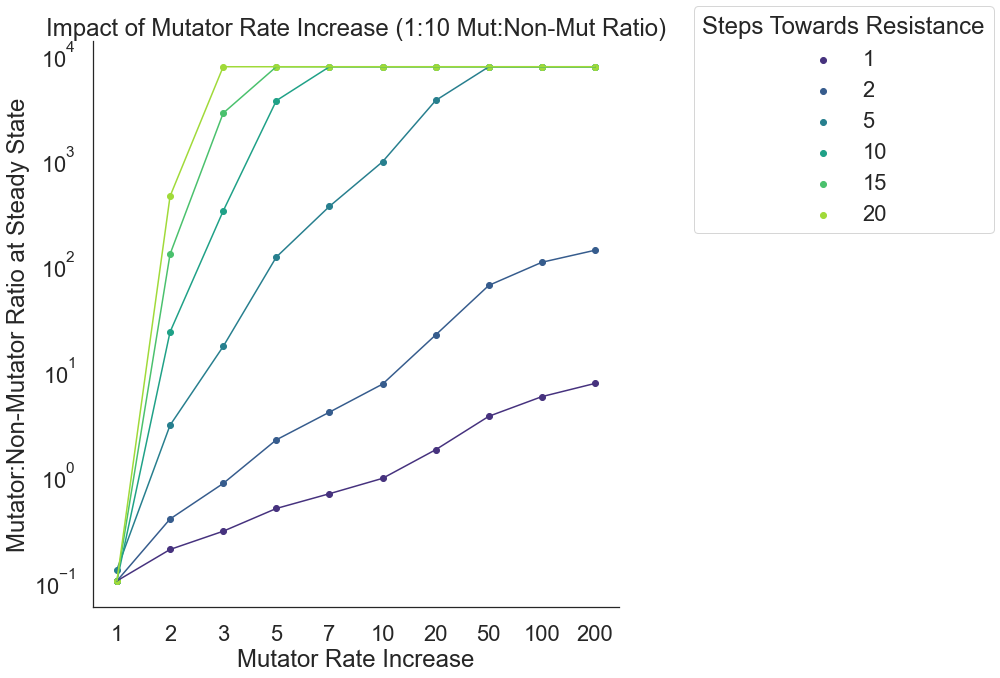

In [113]:
# mutator advantage 1:10
df_time = []
df_mut = []
df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_1_07_18_202223_34_48/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_07_18_202223_34_55/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_5_07_18_202223_35_18/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_7_07_18_202223_35_30/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_10_07_18_202223_35_39/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_20_07_18_202223_35_49/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               
df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_50_07_18_202223_35_58/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_100_07_18_202223_36_12/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/single_step.csv').clip(lower=1).fillna(0)
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/two_steps.csv').clip(lower=1).fillna(0)
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/five_steps.csv').clip(lower=1).fillna(0)
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/ten_steps.csv').clip(lower=1).fillna(0)
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/fifteen_steps.csv').clip(lower=1).fillna(0)
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_200_07_18_202223_36_21/twenty_steps.csv').clip(lower=1).fillna(0)
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df1['Total Persister Cells'].iloc[i]
        per_last_cell_count = df1['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df1['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df1['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df2['Total Persister Cells'].iloc[i]
        per_last_cell_count = df2['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df2['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df2['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df5['Total Persister Cells'].iloc[i]
        per_last_cell_count = df5['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df5['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df5['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df10['Total Persister Cells'].iloc[i]
        per_last_cell_count = df10['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df10['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df10['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df15['Total Persister Cells'].iloc[i]
        per_last_cell_count = df15['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df15['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df15['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break
for i in range(0, 300):
    if i > 0:
        per_current_cell_count = df20['Total Persister Cells'].iloc[i]
        per_last_cell_count = df20['Total Persister Cells'].iloc[i-1]
        per_delta = per_current_cell_count - per_last_cell_count     
        mut_current_cell_count = df20['Total Mutator Cells'].iloc[i]
        mut_last_cell_count = df20['Total Mutator Cells'].iloc[i-1]
        mut_delta = mut_current_cell_count - mut_last_cell_count
        if np.absolute(mut_delta + per_delta) < .01:
            mut_per = mut_current_cell_count/per_current_cell_count
            df_time.append(i)
            df_mut.append(mut_per)
            break                                               

df = pd.DataFrame()
df['Time to Steady State'] = df_time
df['Final Mut:Non-Mut Ratio'] = df_mut
df['Steps to Resistance'] = [1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20, 
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20,
                             1, 2, 5, 10, 15, 20]
df['Variable'] = ['1','1', '1', '1', '1', '1', 
                  '2','2' , '2', '2', '2', '2', 
                  '3', '3','3' , '3', '3', '3',
                  '5', '5','5' , '5', '5', '5', 
                  '7','7' , '7', '7', '7', '7', 
                  '10', '10', '10', '10', '10', '10',
                  '20', '20', '20', '20', '20', '20',
                  '50', '50', '50', '50', '50', '50',
                  '100', '100', '100', '100', '100', '100',
                  '200', '200', '200', '200', '200', '200']
sns.set(style='white', font_scale = 2)
grid = sns.FacetGrid(df, hue="Steps to Resistance", height=10, aspect = 1.5, palette = 'viridis')
grid.map(plt.scatter, 'Variable', 'Final Mut:Non-Mut Ratio').set(yscale="log")
grid.map(plt.plot, 'Variable', 'Final Mut:Non-Mut Ratio').set(yscale="log")
labels = [1, 2, 5, 10, 15, 20]
plt.legend(bbox_to_anchor=(1.1,1.1), 
           borderaxespad=1.0,  title = 'Steps Towards Resistance', labels=labels)
#plt.axhline(y=1e0)
plt.xlabel('Mutator Rate Increase') # X axis data label
plt.ylabel('Mutator:Non-Mutator Ratio at Steady State') # Y axis data label
plt.title('Impact of Mutator Rate Increase (1:10 Mut:Non-Mut Ratio)')
plt.tight_layout()
plt.savefig('test_mut_ad.pdf', bbox_inches='tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


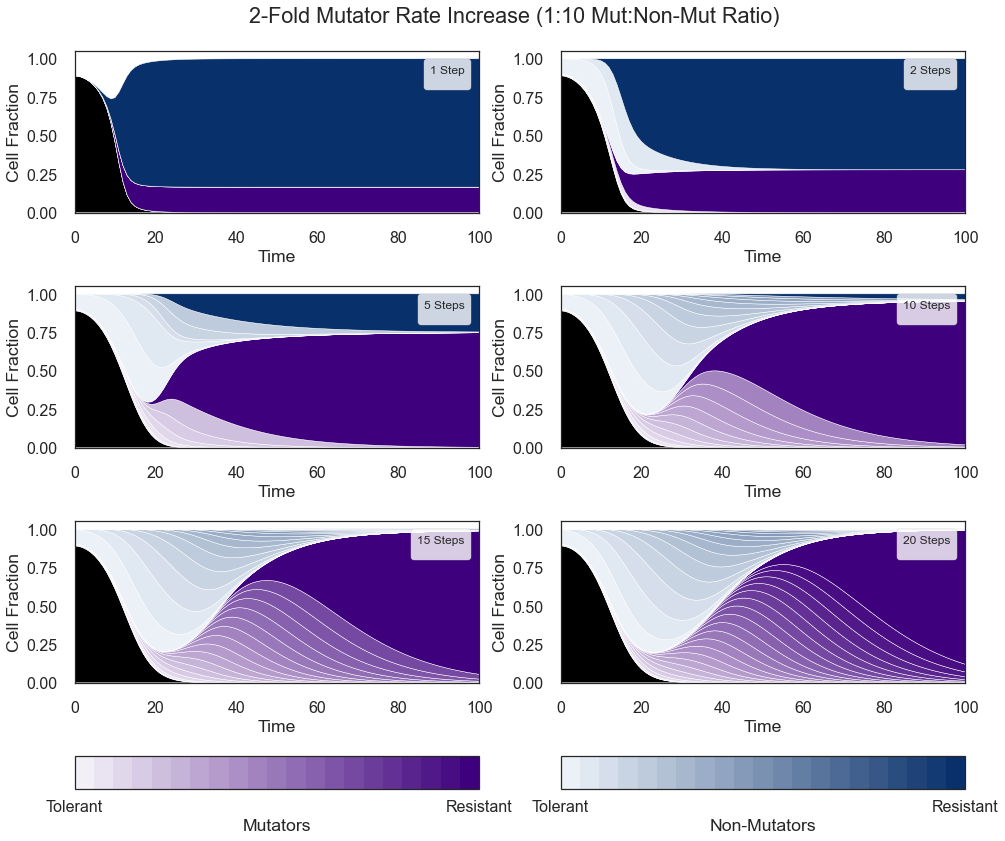

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
import numpy as np 
from sympy import *


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/single_step.csv')
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/two_steps.csv')
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/five_steps.csv')
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/ten_steps.csv')
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/fifteen_steps.csv')
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_2_08_20_202210_21_44/twenty_steps.csv')

df1['Time']
df1['Sensitive'] = df1['Sensitive']/df1['Total Cells']
df1['Persister'] = (df1['Total Persister Cells']-df1['Resistant Persister'])/df1['Total Cells']
df1['Mutator'] = (df1['Total Mutator Cells']-df1['Resistant Mutator'])/df1['Total Cells']
df1['Resistant'] = df1['Resistant']/df1['Total Cells']
df1['Persister0_Fraction'] = df1['Persister']/df1['Total Cells']
df1['Persister_Resistant_Fraction'] = df1['Resistant Persister']/df1['Total Cells']
df1['Mutator0_Fraction'] = df1['Mutator']/df1['Total Cells']
df1['Mutator_Resistant_Fraction'] = df1['Resistant Mutator']/df1['Total Cells']

df2['Time']
df2['Sensitive'] = df2['Sensitive']/df2['Total Cells']
df2['Persister'] = (df2['Total Persister Cells']-df2['Resistant Persister'])/df2['Total Cells']
df2['Mutator'] = (df2['Total Mutator Cells']-df2['Resistant Mutator'])/df2['Total Cells']
df2['Resistant'] = df2['Resistant']/df2['Total Cells']
df2['Persister0_Fraction'] = df2['Persister0']/df2['Total Cells']
df2['Persister1_Fraction'] = df2['Persister1']/df2['Total Cells']
df2['Persister_Resistant_Fraction'] = df2['Resistant Persister']/df2['Total Cells']
df2['Mutator0_Fraction'] = df2['Mutator0']/df2['Total Cells']
df2['Mutator1_Fraction'] = df2['Mutator1']/df2['Total Cells']
df2['Mutator_Resistant_Fraction'] = df2['Resistant Mutator']/df2['Total Cells']

df5['Time']
df5['Sensitive'] = df5['Sensitive']/df5['Total Cells']
df5['Persister'] = (df5['Total Persister Cells']-df5['Resistant Persister'])/df5['Total Cells']
df5['Mutator'] = (df5['Total Mutator Cells']-df5['Resistant Mutator'])/df5['Total Cells']
df5['Resistant'] = df5['Resistant']/df5['Total Cells']
df5['Persister0_Fraction'] = df5['Persister0']/df5['Total Cells']
df5['Persister1_Fraction'] = df5['Persister1']/df5['Total Cells']
df5['Persister2_Fraction'] = df5['Persister2']/df5['Total Cells']
df5['Persister3_Fraction'] = df5['Persister3']/df5['Total Cells']
df5['Persister4_Fraction'] = df5['Persister4']/df5['Total Cells']
df5['Persister_Resistant_Fraction'] = df5['Resistant Persister']/df5['Total Cells']
df5['Mutator0_Fraction'] = df5['Mutator0']/df5['Total Cells']
df5['Mutator1_Fraction'] = df5['Mutator1']/df5['Total Cells']
df5['Mutator2_Fraction'] = df5['Mutator2']/df5['Total Cells']
df5['Mutator3_Fraction'] = df5['Mutator3']/df5['Total Cells']
df5['Mutator4_Fraction'] = df5['Mutator4']/df5['Total Cells']
df5['Mutator_Resistant_Fraction'] = df5['Resistant Mutator']/df5['Total Cells']

df10['Time']
df10['Sensitive'] = df10['Sensitive']/df10['Total Cells']
df10['Persister'] = (df10['Total Persister Cells']-df10['Resistant Persister'])/df10['Total Cells']
df10['Mutator'] = (df10['Total Mutator Cells']-df10['Resistant Mutator'])/df10['Total Cells']
df10['Resistant'] = df10['Resistant']/df10['Total Cells']
df10['Persister0_Fraction'] = df10['Persister0']/df10['Total Cells']
df10['Persister1_Fraction'] = df10['Persister1']/df10['Total Cells']
df10['Persister2_Fraction'] = df10['Persister2']/df10['Total Cells']
df10['Persister3_Fraction'] = df10['Persister3']/df10['Total Cells']
df10['Persister4_Fraction'] = df10['Persister4']/df10['Total Cells']
df10['Persister5_Fraction'] = df10['Persister5']/df10['Total Cells']
df10['Persister6_Fraction'] = df10['Persister6']/df10['Total Cells']
df10['Persister7_Fraction'] = df10['Persister7']/df10['Total Cells']
df10['Persister8_Fraction'] = df10['Persister8']/df10['Total Cells']
df10['Persister9_Fraction'] = df10['Persister9']/df10['Total Cells']
df10['Persister_Resistant_Fraction'] = df10['Resistant Persister']/df10['Total Cells']
df10['Mutator0_Fraction'] = df10['Mutator0']/df10['Total Cells']
df10['Mutator1_Fraction'] = df10['Mutator1']/df10['Total Cells']
df10['Mutator2_Fraction'] = df10['Mutator2']/df10['Total Cells']
df10['Mutator3_Fraction'] = df10['Mutator3']/df10['Total Cells']
df10['Mutator4_Fraction'] = df10['Mutator4']/df10['Total Cells']
df10['Mutator5_Fraction'] = df10['Mutator5']/df10['Total Cells']
df10['Mutator6_Fraction'] = df10['Mutator6']/df10['Total Cells']
df10['Mutator7_Fraction'] = df10['Mutator7']/df10['Total Cells']
df10['Mutator8_Fraction'] = df10['Mutator8']/df10['Total Cells']
df10['Mutator9_Fraction'] = df10['Mutator9']/df10['Total Cells']
df10['Mutator_Resistant_Fraction'] = df10['Resistant Mutator']/df10['Total Cells']

df15['Sensitive'] = df15['Sensitive']/df15['Total Cells']
df15['Persister'] = (df15['Total Persister Cells']-df15['Resistant Persister'])/df15['Total Cells']
df15['Mutator'] = (df15['Total Mutator Cells']-df15['Resistant Mutator'])/df15['Total Cells']
df15['Resistant'] = df15['Resistant']/df15['Total Cells']
df15['Persister0_Fraction'] = df15['Persister0']/df15['Total Cells']
df15['Persister1_Fraction'] = df15['Persister1']/df15['Total Cells']
df15['Persister2_Fraction'] = df15['Persister2']/df15['Total Cells']
df15['Persister3_Fraction'] = df15['Persister3']/df15['Total Cells']
df15['Persister4_Fraction'] = df15['Persister4']/df15['Total Cells']
df15['Persister5_Fraction'] = df15['Persister5']/df15['Total Cells']
df15['Persister6_Fraction'] = df15['Persister6']/df15['Total Cells']
df15['Persister7_Fraction'] = df15['Persister7']/df15['Total Cells']
df15['Persister8_Fraction'] = df15['Persister8']/df15['Total Cells']
df15['Persister9_Fraction'] = df15['Persister9']/df15['Total Cells']
df15['Persister10_Fraction'] = df15['Persister10']/df15['Total Cells']
df15['Persister11_Fraction'] = df15['Persister11']/df15['Total Cells']
df15['Persister12_Fraction'] = df15['Persister12']/df15['Total Cells']
df15['Persister13_Fraction'] = df15['Persister13']/df15['Total Cells']
df15['Persister14_Fraction'] = df15['Persister14']/df15['Total Cells']
df15['Persister_Resistant_Fraction'] = df15['Resistant Persister']/df15['Total Cells']
df15['Mutator0_Fraction'] = df15['Mutator0']/df15['Total Cells']
df15['Mutator1_Fraction'] = df15['Mutator1']/df15['Total Cells']
df15['Mutator2_Fraction'] = df15['Mutator2']/df15['Total Cells']
df15['Mutator3_Fraction'] = df15['Mutator3']/df15['Total Cells']
df15['Mutator4_Fraction'] = df15['Mutator4']/df15['Total Cells']
df15['Mutator5_Fraction'] = df15['Mutator5']/df15['Total Cells']
df15['Mutator6_Fraction'] = df15['Mutator6']/df15['Total Cells']
df15['Mutator7_Fraction'] = df15['Mutator7']/df15['Total Cells']
df15['Mutator8_Fraction'] = df15['Mutator8']/df15['Total Cells']
df15['Mutator9_Fraction'] = df15['Mutator9']/df15['Total Cells']
df15['Mutator10_Fraction'] = df15['Mutator10']/df15['Total Cells']
df15['Mutator11_Fraction'] = df15['Mutator11']/df15['Total Cells']
df15['Mutator12_Fraction'] = df15['Mutator12']/df15['Total Cells']
df15['Mutator13_Fraction'] = df15['Mutator13']/df15['Total Cells']
df15['Mutator14_Fraction'] = df15['Mutator14']/df15['Total Cells']
df15['Mutator_Resistant_Fraction'] = df15['Resistant Mutator']/df15['Total Cells']


df20['Sensitive'] = df20['Sensitive']/df20['Total Cells']
df20['Persister'] = (df20['Total Persister Cells']-df20['Resistant Persister'])/df20['Total Cells']
df20['Mutator'] = (df20['Total Mutator Cells']-df20['Resistant Mutator'])/df20['Total Cells']
df20['Resistant'] = df20['Resistant']/df20['Total Cells']
df20['Persister0_Fraction'] = df20['Persister0']/df20['Total Cells']
df20['Persister1_Fraction'] = df20['Persister1']/df20['Total Cells']
df20['Persister2_Fraction'] = df20['Persister2']/df20['Total Cells']
df20['Persister3_Fraction'] = df20['Persister3']/df20['Total Cells']
df20['Persister4_Fraction'] = df20['Persister4']/df20['Total Cells']
df20['Persister5_Fraction'] = df20['Persister5']/df20['Total Cells']
df20['Persister6_Fraction'] = df20['Persister6']/df20['Total Cells']
df20['Persister7_Fraction'] = df20['Persister7']/df20['Total Cells']
df20['Persister8_Fraction'] = df20['Persister8']/df20['Total Cells']
df20['Persister9_Fraction'] = df20['Persister9']/df20['Total Cells']
df20['Persister10_Fraction'] = df20['Persister10']/df20['Total Cells']
df20['Persister11_Fraction'] = df20['Persister11']/df20['Total Cells']
df20['Persister12_Fraction'] = df20['Persister12']/df20['Total Cells']
df20['Persister13_Fraction'] = df20['Persister13']/df20['Total Cells']
df20['Persister14_Fraction'] = df20['Persister14']/df20['Total Cells']
df20['Persister15_Fraction'] = df20['Persister15']/df20['Total Cells']
df20['Persister16_Fraction'] = df20['Persister16']/df20['Total Cells']
df20['Persister17_Fraction'] = df20['Persister17']/df20['Total Cells']
df20['Persister18_Fraction'] = df20['Persister18']/df20['Total Cells']
df20['Persister19_Fraction'] = df20['Persister19']/df20['Total Cells']
df20['Persister_Resistant_Fraction'] = df20['Resistant Persister']/df20['Total Cells']
df20['Mutator0_Fraction'] = df20['Mutator0']/df20['Total Cells']
df20['Mutator1_Fraction'] = df20['Mutator1']/df20['Total Cells']
df20['Mutator2_Fraction'] = df20['Mutator2']/df20['Total Cells']
df20['Mutator3_Fraction'] = df20['Mutator3']/df20['Total Cells']
df20['Mutator4_Fraction'] = df20['Mutator4']/df20['Total Cells']
df20['Mutator5_Fraction'] = df20['Mutator5']/df20['Total Cells']
df20['Mutator6_Fraction'] = df20['Mutator6']/df20['Total Cells']
df20['Mutator7_Fraction'] = df20['Mutator7']/df20['Total Cells']
df20['Mutator8_Fraction'] = df20['Mutator8']/df20['Total Cells']
df20['Mutator9_Fraction'] = df20['Mutator9']/df20['Total Cells']
df20['Mutator10_Fraction'] = df20['Mutator10']/df20['Total Cells']
df20['Mutator11_Fraction'] = df20['Mutator11']/df20['Total Cells']
df20['Mutator12_Fraction'] = df20['Mutator12']/df20['Total Cells']
df20['Mutator13_Fraction'] = df20['Mutator13']/df20['Total Cells']
df20['Mutator14_Fraction'] = df20['Mutator14']/df20['Total Cells']
df20['Mutator15_Fraction'] = df20['Mutator15']/df20['Total Cells']
df20['Mutator16_Fraction'] = df20['Mutator16']/df20['Total Cells']
df20['Mutator17_Fraction'] = df20['Mutator17']/df20['Total Cells']
df20['Mutator18_Fraction'] = df20['Mutator18']/df20['Total Cells']
df20['Mutator19_Fraction'] = df20['Mutator19']/df20['Total Cells']
df20['Mutator_Resistant_Fraction'] = df20['Resistant Mutator']/df20['Total Cells']

cmap1 = ['black', '#f3eff7', '#3f007d',
          '#ecf1f8', '#08306b']
cmap2 = ['black', '#f3eff7', '#eae3f1', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#08306b']          
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap15 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']
          
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
plt.rcParams.update({'font.size': 18}) 
fig, axes = plt.subplots(4, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1/5]})
fig.subplots_adjust(bottom=0.6)
fig.suptitle('2-Fold Mutator Rate Increase (1:10 Mut:Non-Mut Ratio)')
axes[0, 0].stackplot(df1.Time, df1.Sensitive, df1.Mutator0_Fraction, 
                     df1.Mutator_Resistant_Fraction,
                     df1.Persister0_Fraction,
                     df1.Persister_Resistant_Fraction,
              colors = cmap1)
axes[0, 0].legend(loc='best',  title = '1 Step')              
axes[0, 1].stackplot(df2.Time, df2.Sensitive, df2.Mutator0_Fraction, 
                     df2.Mutator1_Fraction,
                     df2.Mutator_Resistant_Fraction,
                     df2.Persister0_Fraction, df2.Persister1_Fraction,
                     df2.Persister_Resistant_Fraction,
              colors = cmap2)
axes[0, 1].legend(loc='best',  title = '2 Steps')              
axes[1, 0].stackplot(df5.Time, df5.Sensitive, df5.Mutator0_Fraction, 
                     df5.Mutator1_Fraction, df5.Mutator2_Fraction,
                     df5.Mutator3_Fraction, df5.Mutator4_Fraction,
                     df5.Mutator_Resistant_Fraction,
                     df5.Persister0_Fraction, df5.Persister1_Fraction, df5.Persister2_Fraction,
                     df5.Persister3_Fraction, df5.Persister4_Fraction,
                     df5.Persister_Resistant_Fraction,
              colors = cmap5)
axes[1, 0].legend(loc='best',  title = '5 Steps')              
axes[1, 1].stackplot(df10.Time, df10.Sensitive, df10.Mutator0_Fraction, 
                     df10.Mutator1_Fraction, df10.Mutator2_Fraction,
                     df10.Mutator3_Fraction, df10.Mutator4_Fraction, df10.Mutator5_Fraction, df10.Mutator6_Fraction,
                     df10.Mutator7_Fraction, df10.Mutator8_Fraction, df10.Mutator9_Fraction, 
                     df10.Mutator_Resistant_Fraction,
                     df10.Persister0_Fraction, df10.Persister1_Fraction, df10.Persister2_Fraction,
                     df10.Persister3_Fraction, df10.Persister4_Fraction, df10.Persister5_Fraction, df10.Persister6_Fraction,
                     df10.Persister7_Fraction, df10.Persister8_Fraction, df10.Persister9_Fraction,  
                     df10.Persister_Resistant_Fraction,
              colors = cmap10)
axes[1, 1].legend(loc='best',  title = '10 Steps')              
axes[2, 0].stackplot(df15.Time, df15.Sensitive, df15.Mutator0_Fraction, 
                     df15.Mutator1_Fraction, df15.Mutator2_Fraction,
                     df15.Mutator3_Fraction, df15.Mutator4_Fraction, df15.Mutator5_Fraction, df15.Mutator6_Fraction,
                     df15.Mutator7_Fraction, df15.Mutator8_Fraction, df15.Mutator9_Fraction, df15.Mutator10_Fraction, df15.Mutator11_Fraction, 
                     df15.Mutator12_Fraction, df15.Mutator13_Fraction, df15.Mutator14_Fraction,  
                     df15.Mutator_Resistant_Fraction,
                     df15.Persister0_Fraction, df15.Persister1_Fraction, df15.Persister2_Fraction,
                     df15.Persister3_Fraction, df15.Persister4_Fraction, df15.Persister5_Fraction, df15.Persister6_Fraction,
                     df15.Persister7_Fraction, df15.Persister8_Fraction, df15.Persister9_Fraction,  df15.Persister10_Fraction, df15.Persister11_Fraction, 
                     df15.Persister12_Fraction, df15.Persister13_Fraction, df15.Persister14_Fraction,  
                     df15.Persister_Resistant_Fraction,
              colors = cmap15)
axes[2, 0].legend(loc='best',  title = '15 Steps')                                    
axes[2, 1].stackplot(df20.Time, df20.Sensitive, df20.Mutator0_Fraction, 
                     df20.Mutator1_Fraction, df20.Mutator2_Fraction,
                     df20.Mutator3_Fraction, df20.Mutator4_Fraction, df20.Mutator5_Fraction, df20.Mutator6_Fraction,
                     df20.Mutator7_Fraction, df20.Mutator8_Fraction, df20.Mutator9_Fraction, df20.Mutator10_Fraction, df20.Mutator11_Fraction, 
                     df20.Mutator12_Fraction, df20.Mutator13_Fraction, df20.Mutator14_Fraction, df20.Mutator15_Fraction, df20.Mutator16_Fraction,
                     df20.Mutator17_Fraction, df20.Mutator18_Fraction, df20.Mutator19_Fraction,   
                     df20.Mutator_Resistant_Fraction,
                     df20.Persister0_Fraction, df20.Persister1_Fraction, df20.Persister2_Fraction,
                     df20.Persister3_Fraction, df20.Persister4_Fraction, df20.Persister5_Fraction, df20.Persister6_Fraction,
                     df20.Persister7_Fraction, df20.Persister8_Fraction, df20.Persister9_Fraction,  df20.Persister10_Fraction, df20.Persister11_Fraction, 
                     df20.Persister12_Fraction, df20.Persister13_Fraction, df20.Persister14_Fraction, df20.Persister15_Fraction, df20.Persister16_Fraction,
                     df20.Persister17_Fraction, df20.Persister18_Fraction, df20.Persister19_Fraction,   
                     df20.Persister_Resistant_Fraction,
              colors = cmap20)
axes[2, 1].legend(loc='best', title = '20 Steps')
cols1 = ['#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d']
vals1 = list(range(len(cols1)))
bounds1 = np.append(vals1, vals1[-1] + 1)
cmap1 = ListedColormap(cols1)
norm1 = BoundaryNorm(bounds1, ncolors=len(cols1))

cols2 = ['#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b'
          ]
vals2 = list(range(len(cols2)))
bounds2 = np.append(vals2, vals2[-1] + 1)
cmap2 = ListedColormap(cols2)
norm2 = BoundaryNorm(bounds2, ncolors=len(cols2))
cbar = fig.colorbar(ScalarMappable(norm=norm1, cmap=cmap1),
             cax=axes[3, 0], orientation='horizontal', label='Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 0].tick_params(size=0)          
cbar = fig.colorbar(ScalarMappable(norm=norm2, cmap=cmap2),
             cax=axes[3, 1], orientation='horizontal', label='Non-Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 1].tick_params(size=0)
axes[0, 0].set_ylabel('Cell Fraction')
axes[0, 0].set_xlabel('Time')
axes[0, 1].set_ylabel('Cell Fraction')
axes[0, 1].set_xlabel('Time')
axes[1, 0].set_ylabel('Cell Fraction')
axes[1, 0].set_xlabel('Time')
axes[1, 1].set_ylabel('Cell Fraction')
axes[1, 1].set_xlabel('Time') 
axes[2, 0].set_ylabel('Cell Fraction')
axes[2, 0].set_xlabel('Time')
axes[2, 1].set_ylabel('Cell Fraction')
axes[2, 1].set_xlabel('Time')
axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 100])
axes[1, 0].set_xlim([0, 100])  
axes[1, 1].set_xlim([0, 100])  
axes[2, 0].set_xlim([0, 100])  
axes[2, 1].set_xlim([0, 100])  
plt.tight_layout()
plt.savefig('1:10_2_mut_ad.pdf', bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


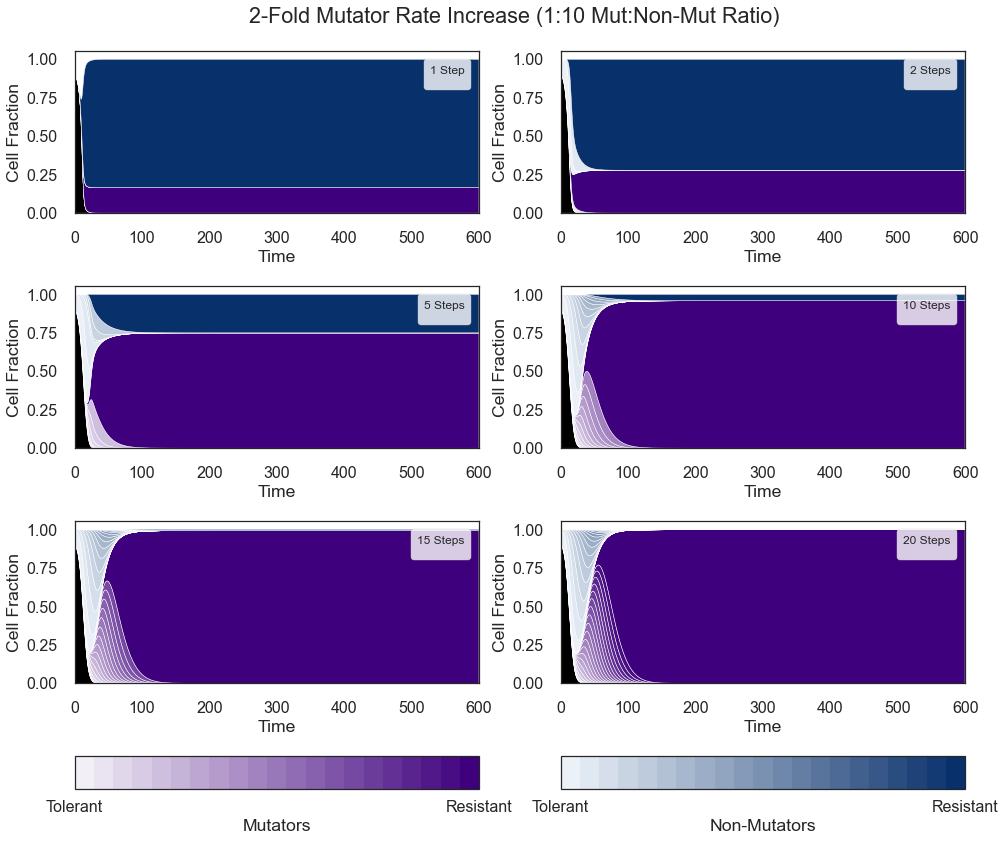

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
import numpy as np 
from sympy import *


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/single_step.csv')
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/two_steps.csv')
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/five_steps.csv')
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/ten_steps.csv')
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/fifteen_steps.csv')
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_600_timesteps_09_06_202218_16_24/twenty_steps.csv')

df1['Time']
df1['Sensitive'] = df1['Sensitive']/df1['Total Cells']
df1['Persister'] = (df1['Total Persister Cells']-df1['Resistant Persister'])/df1['Total Cells']
df1['Mutator'] = (df1['Total Mutator Cells']-df1['Resistant Mutator'])/df1['Total Cells']
df1['Resistant'] = df1['Resistant']/df1['Total Cells']
df1['Persister0_Fraction'] = df1['Persister']/df1['Total Cells']
df1['Persister_Resistant_Fraction'] = df1['Resistant Persister']/df1['Total Cells']
df1['Mutator0_Fraction'] = df1['Mutator']/df1['Total Cells']
df1['Mutator_Resistant_Fraction'] = df1['Resistant Mutator']/df1['Total Cells']

df2['Time']
df2['Sensitive'] = df2['Sensitive']/df2['Total Cells']
df2['Persister'] = (df2['Total Persister Cells']-df2['Resistant Persister'])/df2['Total Cells']
df2['Mutator'] = (df2['Total Mutator Cells']-df2['Resistant Mutator'])/df2['Total Cells']
df2['Resistant'] = df2['Resistant']/df2['Total Cells']
df2['Persister0_Fraction'] = df2['Persister0']/df2['Total Cells']
df2['Persister1_Fraction'] = df2['Persister1']/df2['Total Cells']
df2['Persister_Resistant_Fraction'] = df2['Resistant Persister']/df2['Total Cells']
df2['Mutator0_Fraction'] = df2['Mutator0']/df2['Total Cells']
df2['Mutator1_Fraction'] = df2['Mutator1']/df2['Total Cells']
df2['Mutator_Resistant_Fraction'] = df2['Resistant Mutator']/df2['Total Cells']

df5['Time']
df5['Sensitive'] = df5['Sensitive']/df5['Total Cells']
df5['Persister'] = (df5['Total Persister Cells']-df5['Resistant Persister'])/df5['Total Cells']
df5['Mutator'] = (df5['Total Mutator Cells']-df5['Resistant Mutator'])/df5['Total Cells']
df5['Resistant'] = df5['Resistant']/df5['Total Cells']
df5['Persister0_Fraction'] = df5['Persister0']/df5['Total Cells']
df5['Persister1_Fraction'] = df5['Persister1']/df5['Total Cells']
df5['Persister2_Fraction'] = df5['Persister2']/df5['Total Cells']
df5['Persister3_Fraction'] = df5['Persister3']/df5['Total Cells']
df5['Persister4_Fraction'] = df5['Persister4']/df5['Total Cells']
df5['Persister_Resistant_Fraction'] = df5['Resistant Persister']/df5['Total Cells']
df5['Mutator0_Fraction'] = df5['Mutator0']/df5['Total Cells']
df5['Mutator1_Fraction'] = df5['Mutator1']/df5['Total Cells']
df5['Mutator2_Fraction'] = df5['Mutator2']/df5['Total Cells']
df5['Mutator3_Fraction'] = df5['Mutator3']/df5['Total Cells']
df5['Mutator4_Fraction'] = df5['Mutator4']/df5['Total Cells']
df5['Mutator_Resistant_Fraction'] = df5['Resistant Mutator']/df5['Total Cells']

df10['Time']
df10['Sensitive'] = df10['Sensitive']/df10['Total Cells']
df10['Persister'] = (df10['Total Persister Cells']-df10['Resistant Persister'])/df10['Total Cells']
df10['Mutator'] = (df10['Total Mutator Cells']-df10['Resistant Mutator'])/df10['Total Cells']
df10['Resistant'] = df10['Resistant']/df10['Total Cells']
df10['Persister0_Fraction'] = df10['Persister0']/df10['Total Cells']
df10['Persister1_Fraction'] = df10['Persister1']/df10['Total Cells']
df10['Persister2_Fraction'] = df10['Persister2']/df10['Total Cells']
df10['Persister3_Fraction'] = df10['Persister3']/df10['Total Cells']
df10['Persister4_Fraction'] = df10['Persister4']/df10['Total Cells']
df10['Persister5_Fraction'] = df10['Persister5']/df10['Total Cells']
df10['Persister6_Fraction'] = df10['Persister6']/df10['Total Cells']
df10['Persister7_Fraction'] = df10['Persister7']/df10['Total Cells']
df10['Persister8_Fraction'] = df10['Persister8']/df10['Total Cells']
df10['Persister9_Fraction'] = df10['Persister9']/df10['Total Cells']
df10['Persister_Resistant_Fraction'] = df10['Resistant Persister']/df10['Total Cells']
df10['Mutator0_Fraction'] = df10['Mutator0']/df10['Total Cells']
df10['Mutator1_Fraction'] = df10['Mutator1']/df10['Total Cells']
df10['Mutator2_Fraction'] = df10['Mutator2']/df10['Total Cells']
df10['Mutator3_Fraction'] = df10['Mutator3']/df10['Total Cells']
df10['Mutator4_Fraction'] = df10['Mutator4']/df10['Total Cells']
df10['Mutator5_Fraction'] = df10['Mutator5']/df10['Total Cells']
df10['Mutator6_Fraction'] = df10['Mutator6']/df10['Total Cells']
df10['Mutator7_Fraction'] = df10['Mutator7']/df10['Total Cells']
df10['Mutator8_Fraction'] = df10['Mutator8']/df10['Total Cells']
df10['Mutator9_Fraction'] = df10['Mutator9']/df10['Total Cells']
df10['Mutator_Resistant_Fraction'] = df10['Resistant Mutator']/df10['Total Cells']

df15['Sensitive'] = df15['Sensitive']/df15['Total Cells']
df15['Persister'] = (df15['Total Persister Cells']-df15['Resistant Persister'])/df15['Total Cells']
df15['Mutator'] = (df15['Total Mutator Cells']-df15['Resistant Mutator'])/df15['Total Cells']
df15['Resistant'] = df15['Resistant']/df15['Total Cells']
df15['Persister0_Fraction'] = df15['Persister0']/df15['Total Cells']
df15['Persister1_Fraction'] = df15['Persister1']/df15['Total Cells']
df15['Persister2_Fraction'] = df15['Persister2']/df15['Total Cells']
df15['Persister3_Fraction'] = df15['Persister3']/df15['Total Cells']
df15['Persister4_Fraction'] = df15['Persister4']/df15['Total Cells']
df15['Persister5_Fraction'] = df15['Persister5']/df15['Total Cells']
df15['Persister6_Fraction'] = df15['Persister6']/df15['Total Cells']
df15['Persister7_Fraction'] = df15['Persister7']/df15['Total Cells']
df15['Persister8_Fraction'] = df15['Persister8']/df15['Total Cells']
df15['Persister9_Fraction'] = df15['Persister9']/df15['Total Cells']
df15['Persister10_Fraction'] = df15['Persister10']/df15['Total Cells']
df15['Persister11_Fraction'] = df15['Persister11']/df15['Total Cells']
df15['Persister12_Fraction'] = df15['Persister12']/df15['Total Cells']
df15['Persister13_Fraction'] = df15['Persister13']/df15['Total Cells']
df15['Persister14_Fraction'] = df15['Persister14']/df15['Total Cells']
df15['Persister_Resistant_Fraction'] = df15['Resistant Persister']/df15['Total Cells']
df15['Mutator0_Fraction'] = df15['Mutator0']/df15['Total Cells']
df15['Mutator1_Fraction'] = df15['Mutator1']/df15['Total Cells']
df15['Mutator2_Fraction'] = df15['Mutator2']/df15['Total Cells']
df15['Mutator3_Fraction'] = df15['Mutator3']/df15['Total Cells']
df15['Mutator4_Fraction'] = df15['Mutator4']/df15['Total Cells']
df15['Mutator5_Fraction'] = df15['Mutator5']/df15['Total Cells']
df15['Mutator6_Fraction'] = df15['Mutator6']/df15['Total Cells']
df15['Mutator7_Fraction'] = df15['Mutator7']/df15['Total Cells']
df15['Mutator8_Fraction'] = df15['Mutator8']/df15['Total Cells']
df15['Mutator9_Fraction'] = df15['Mutator9']/df15['Total Cells']
df15['Mutator10_Fraction'] = df15['Mutator10']/df15['Total Cells']
df15['Mutator11_Fraction'] = df15['Mutator11']/df15['Total Cells']
df15['Mutator12_Fraction'] = df15['Mutator12']/df15['Total Cells']
df15['Mutator13_Fraction'] = df15['Mutator13']/df15['Total Cells']
df15['Mutator14_Fraction'] = df15['Mutator14']/df15['Total Cells']
df15['Mutator_Resistant_Fraction'] = df15['Resistant Mutator']/df15['Total Cells']


df20['Sensitive'] = df20['Sensitive']/df20['Total Cells']
df20['Persister'] = (df20['Total Persister Cells']-df20['Resistant Persister'])/df20['Total Cells']
df20['Mutator'] = (df20['Total Mutator Cells']-df20['Resistant Mutator'])/df20['Total Cells']
df20['Resistant'] = df20['Resistant']/df20['Total Cells']
df20['Persister0_Fraction'] = df20['Persister0']/df20['Total Cells']
df20['Persister1_Fraction'] = df20['Persister1']/df20['Total Cells']
df20['Persister2_Fraction'] = df20['Persister2']/df20['Total Cells']
df20['Persister3_Fraction'] = df20['Persister3']/df20['Total Cells']
df20['Persister4_Fraction'] = df20['Persister4']/df20['Total Cells']
df20['Persister5_Fraction'] = df20['Persister5']/df20['Total Cells']
df20['Persister6_Fraction'] = df20['Persister6']/df20['Total Cells']
df20['Persister7_Fraction'] = df20['Persister7']/df20['Total Cells']
df20['Persister8_Fraction'] = df20['Persister8']/df20['Total Cells']
df20['Persister9_Fraction'] = df20['Persister9']/df20['Total Cells']
df20['Persister10_Fraction'] = df20['Persister10']/df20['Total Cells']
df20['Persister11_Fraction'] = df20['Persister11']/df20['Total Cells']
df20['Persister12_Fraction'] = df20['Persister12']/df20['Total Cells']
df20['Persister13_Fraction'] = df20['Persister13']/df20['Total Cells']
df20['Persister14_Fraction'] = df20['Persister14']/df20['Total Cells']
df20['Persister15_Fraction'] = df20['Persister15']/df20['Total Cells']
df20['Persister16_Fraction'] = df20['Persister16']/df20['Total Cells']
df20['Persister17_Fraction'] = df20['Persister17']/df20['Total Cells']
df20['Persister18_Fraction'] = df20['Persister18']/df20['Total Cells']
df20['Persister19_Fraction'] = df20['Persister19']/df20['Total Cells']
df20['Persister_Resistant_Fraction'] = df20['Resistant Persister']/df20['Total Cells']
df20['Mutator0_Fraction'] = df20['Mutator0']/df20['Total Cells']
df20['Mutator1_Fraction'] = df20['Mutator1']/df20['Total Cells']
df20['Mutator2_Fraction'] = df20['Mutator2']/df20['Total Cells']
df20['Mutator3_Fraction'] = df20['Mutator3']/df20['Total Cells']
df20['Mutator4_Fraction'] = df20['Mutator4']/df20['Total Cells']
df20['Mutator5_Fraction'] = df20['Mutator5']/df20['Total Cells']
df20['Mutator6_Fraction'] = df20['Mutator6']/df20['Total Cells']
df20['Mutator7_Fraction'] = df20['Mutator7']/df20['Total Cells']
df20['Mutator8_Fraction'] = df20['Mutator8']/df20['Total Cells']
df20['Mutator9_Fraction'] = df20['Mutator9']/df20['Total Cells']
df20['Mutator10_Fraction'] = df20['Mutator10']/df20['Total Cells']
df20['Mutator11_Fraction'] = df20['Mutator11']/df20['Total Cells']
df20['Mutator12_Fraction'] = df20['Mutator12']/df20['Total Cells']
df20['Mutator13_Fraction'] = df20['Mutator13']/df20['Total Cells']
df20['Mutator14_Fraction'] = df20['Mutator14']/df20['Total Cells']
df20['Mutator15_Fraction'] = df20['Mutator15']/df20['Total Cells']
df20['Mutator16_Fraction'] = df20['Mutator16']/df20['Total Cells']
df20['Mutator17_Fraction'] = df20['Mutator17']/df20['Total Cells']
df20['Mutator18_Fraction'] = df20['Mutator18']/df20['Total Cells']
df20['Mutator19_Fraction'] = df20['Mutator19']/df20['Total Cells']
df20['Mutator_Resistant_Fraction'] = df20['Resistant Mutator']/df20['Total Cells']

cmap1 = ['black', '#f3eff7', '#3f007d',
          '#ecf1f8', '#08306b']
cmap2 = ['black', '#f3eff7', '#eae3f1', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#08306b']          
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap15 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']
          
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
plt.rcParams.update({'font.size': 18}) 
fig, axes = plt.subplots(4, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1/5]})
fig.subplots_adjust(bottom=0.6)
fig.suptitle('2-Fold Mutator Rate Increase (1:10 Mut:Non-Mut Ratio)')
axes[0, 0].stackplot(df1.Time, df1.Sensitive, df1.Mutator0_Fraction, 
                     df1.Mutator_Resistant_Fraction,
                     df1.Persister0_Fraction,
                     df1.Persister_Resistant_Fraction,
              colors = cmap1)
axes[0, 0].legend(loc = 'best',  title = '1 Step')              
axes[0, 1].stackplot(df2.Time, df2.Sensitive, df2.Mutator0_Fraction, 
                     df2.Mutator1_Fraction,
                     df2.Mutator_Resistant_Fraction,
                     df2.Persister0_Fraction, df2.Persister1_Fraction,
                     df2.Persister_Resistant_Fraction,
              colors = cmap2)
axes[0, 1].legend(loc = 'best',  title = '2 Steps')              
axes[1, 0].stackplot(df5.Time, df5.Sensitive, df5.Mutator0_Fraction, 
                     df5.Mutator1_Fraction, df5.Mutator2_Fraction,
                     df5.Mutator3_Fraction, df5.Mutator4_Fraction,
                     df5.Mutator_Resistant_Fraction,
                     df5.Persister0_Fraction, df5.Persister1_Fraction, df5.Persister2_Fraction,
                     df5.Persister3_Fraction, df5.Persister4_Fraction,
                     df5.Persister_Resistant_Fraction,
              colors = cmap5)
axes[1, 0].legend(loc = 'best',  title = '5 Steps')              
axes[1, 1].stackplot(df10.Time, df10.Sensitive, df10.Mutator0_Fraction, 
                     df10.Mutator1_Fraction, df10.Mutator2_Fraction,
                     df10.Mutator3_Fraction, df10.Mutator4_Fraction, df10.Mutator5_Fraction, df10.Mutator6_Fraction,
                     df10.Mutator7_Fraction, df10.Mutator8_Fraction, df10.Mutator9_Fraction, 
                     df10.Mutator_Resistant_Fraction,
                     df10.Persister0_Fraction, df10.Persister1_Fraction, df10.Persister2_Fraction,
                     df10.Persister3_Fraction, df10.Persister4_Fraction, df10.Persister5_Fraction, df10.Persister6_Fraction,
                     df10.Persister7_Fraction, df10.Persister8_Fraction, df10.Persister9_Fraction,  
                     df10.Persister_Resistant_Fraction,
              colors = cmap10)
axes[1, 1].legend(loc = 'best',  title = '10 Steps')              
axes[2, 0].stackplot(df15.Time, df15.Sensitive, df15.Mutator0_Fraction, 
                     df15.Mutator1_Fraction, df15.Mutator2_Fraction,
                     df15.Mutator3_Fraction, df15.Mutator4_Fraction, df15.Mutator5_Fraction, df15.Mutator6_Fraction,
                     df15.Mutator7_Fraction, df15.Mutator8_Fraction, df15.Mutator9_Fraction, df15.Mutator10_Fraction, df15.Mutator11_Fraction, 
                     df15.Mutator12_Fraction, df15.Mutator13_Fraction, df15.Mutator14_Fraction,  
                     df15.Mutator_Resistant_Fraction,
                     df15.Persister0_Fraction, df15.Persister1_Fraction, df15.Persister2_Fraction,
                     df15.Persister3_Fraction, df15.Persister4_Fraction, df15.Persister5_Fraction, df15.Persister6_Fraction,
                     df15.Persister7_Fraction, df15.Persister8_Fraction, df15.Persister9_Fraction,  df15.Persister10_Fraction, df15.Persister11_Fraction, 
                     df15.Persister12_Fraction, df15.Persister13_Fraction, df15.Persister14_Fraction,  
                     df15.Persister_Resistant_Fraction,
              colors = cmap15)
axes[2, 0].legend(loc = 'best',  title = '15 Steps')                                    
axes[2, 1].stackplot(df20.Time, df20.Sensitive, df20.Mutator0_Fraction, 
                     df20.Mutator1_Fraction, df20.Mutator2_Fraction,
                     df20.Mutator3_Fraction, df20.Mutator4_Fraction, df20.Mutator5_Fraction, df20.Mutator6_Fraction,
                     df20.Mutator7_Fraction, df20.Mutator8_Fraction, df20.Mutator9_Fraction, df20.Mutator10_Fraction, df20.Mutator11_Fraction, 
                     df20.Mutator12_Fraction, df20.Mutator13_Fraction, df20.Mutator14_Fraction, df20.Mutator15_Fraction, df20.Mutator16_Fraction,
                     df20.Mutator17_Fraction, df20.Mutator18_Fraction, df20.Mutator19_Fraction,   
                     df20.Mutator_Resistant_Fraction,
                     df20.Persister0_Fraction, df20.Persister1_Fraction, df20.Persister2_Fraction,
                     df20.Persister3_Fraction, df20.Persister4_Fraction, df20.Persister5_Fraction, df20.Persister6_Fraction,
                     df20.Persister7_Fraction, df20.Persister8_Fraction, df20.Persister9_Fraction,  df20.Persister10_Fraction, df20.Persister11_Fraction, 
                     df20.Persister12_Fraction, df20.Persister13_Fraction, df20.Persister14_Fraction, df20.Persister15_Fraction, df20.Persister16_Fraction,
                     df20.Persister17_Fraction, df20.Persister18_Fraction, df20.Persister19_Fraction,   
                     df20.Persister_Resistant_Fraction,
              colors = cmap20)
axes[2, 1].legend(loc = 'best', title = '20 Steps')
cols1 = ['#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d']
vals1 = list(range(len(cols1)))
bounds1 = np.append(vals1, vals1[-1] + 1)
cmap1 = ListedColormap(cols1)
norm1 = BoundaryNorm(bounds1, ncolors=len(cols1))

cols2 = ['#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b'
          ]
vals2 = list(range(len(cols2)))
bounds2 = np.append(vals2, vals2[-1] + 1)
cmap2 = ListedColormap(cols2)
norm2 = BoundaryNorm(bounds2, ncolors=len(cols2))
cbar = fig.colorbar(ScalarMappable(norm=norm1, cmap=cmap1),
             cax=axes[3, 0], orientation='horizontal', label='Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 0].tick_params(size=0)          
cbar = fig.colorbar(ScalarMappable(norm=norm2, cmap=cmap2),
             cax=axes[3, 1], orientation='horizontal', label='Non-Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 1].tick_params(size=0)
axes[0, 0].set_ylabel('Cell Fraction')
axes[0, 0].set_xlabel('Time')
axes[0, 1].set_ylabel('Cell Fraction')
axes[0, 1].set_xlabel('Time')
axes[1, 0].set_ylabel('Cell Fraction')
axes[1, 0].set_xlabel('Time')
axes[1, 1].set_ylabel('Cell Fraction')
axes[1, 1].set_xlabel('Time') 
axes[2, 0].set_ylabel('Cell Fraction')
axes[2, 0].set_xlabel('Time')
axes[2, 1].set_ylabel('Cell Fraction')
axes[2, 1].set_xlabel('Time')
axes[0, 0].set_xlim([0, 600])
axes[0, 1].set_xlim([0, 600])
axes[1, 0].set_xlim([0, 600])  
axes[1, 1].set_xlim([0, 600])  
axes[2, 0].set_xlim([0, 600])  
axes[2, 1].set_xlim([0, 600])  
plt.tight_layout()
plt.savefig('1:10_2_mut_ad_600_t.pdf', bbox_inches='tight')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


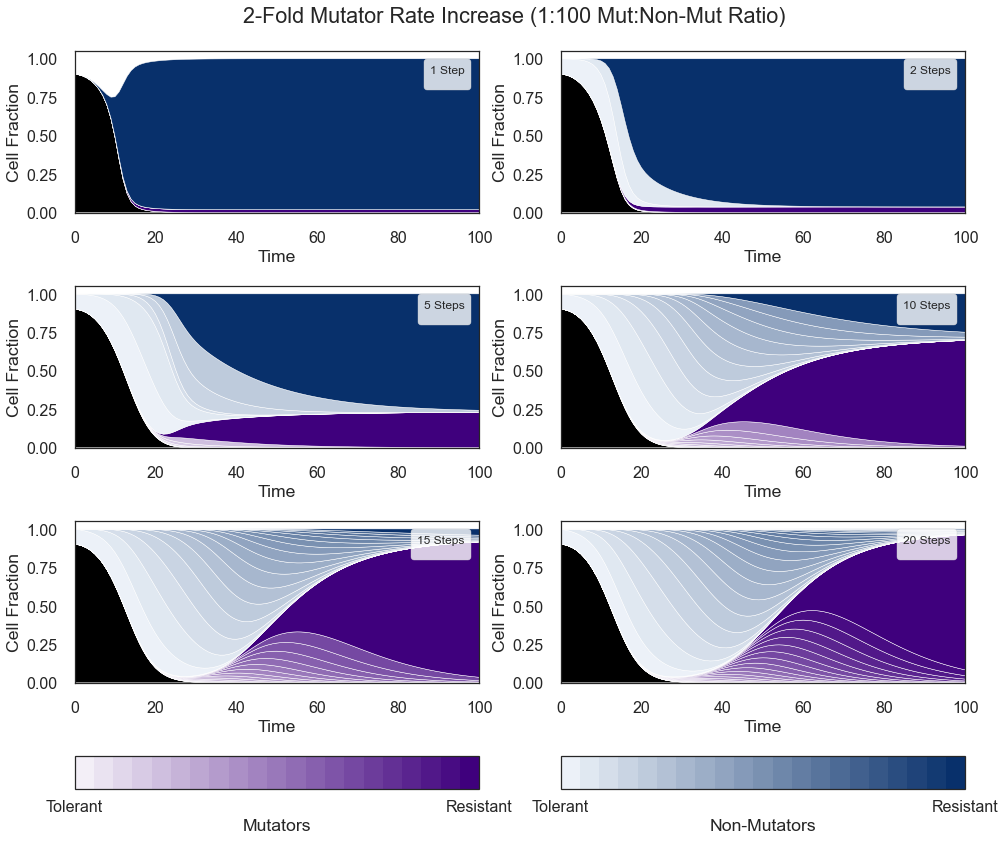

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
import numpy as np 
from sympy import *


df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/single_step.csv')
df2 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/two_steps.csv')
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/five_steps.csv')
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/ten_steps.csv')
df15 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/fifteen_steps.csv')
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_10_mut_ad_2_08_23_202219_06_29/twenty_steps.csv')

df1['Time']
df1['Sensitive'] = df1['Sensitive']/df1['Total Cells']
df1['Persister'] = (df1['Total Persister Cells']-df1['Resistant Persister'])/df1['Total Cells']
df1['Mutator'] = (df1['Total Mutator Cells']-df1['Resistant Mutator'])/df1['Total Cells']
df1['Resistant'] = df1['Resistant']/df1['Total Cells']
df1['Persister0_Fraction'] = df1['Persister']/df1['Total Cells']
df1['Persister_Resistant_Fraction'] = df1['Resistant Persister']/df1['Total Cells']
df1['Mutator0_Fraction'] = df1['Mutator']/df1['Total Cells']
df1['Mutator_Resistant_Fraction'] = df1['Resistant Mutator']/df1['Total Cells']

df2['Time']
df2['Sensitive'] = df2['Sensitive']/df2['Total Cells']
df2['Persister'] = (df2['Total Persister Cells']-df2['Resistant Persister'])/df2['Total Cells']
df2['Mutator'] = (df2['Total Mutator Cells']-df2['Resistant Mutator'])/df2['Total Cells']
df2['Resistant'] = df2['Resistant']/df2['Total Cells']
df2['Persister0_Fraction'] = df2['Persister0']/df2['Total Cells']
df2['Persister1_Fraction'] = df2['Persister1']/df2['Total Cells']
df2['Persister_Resistant_Fraction'] = df2['Resistant Persister']/df2['Total Cells']
df2['Mutator0_Fraction'] = df2['Mutator0']/df2['Total Cells']
df2['Mutator1_Fraction'] = df2['Mutator1']/df2['Total Cells']
df2['Mutator_Resistant_Fraction'] = df2['Resistant Mutator']/df2['Total Cells']

df5['Time']
df5['Sensitive'] = df5['Sensitive']/df5['Total Cells']
df5['Persister'] = (df5['Total Persister Cells']-df5['Resistant Persister'])/df5['Total Cells']
df5['Mutator'] = (df5['Total Mutator Cells']-df5['Resistant Mutator'])/df5['Total Cells']
df5['Resistant'] = df5['Resistant']/df5['Total Cells']
df5['Persister0_Fraction'] = df5['Persister0']/df5['Total Cells']
df5['Persister1_Fraction'] = df5['Persister1']/df5['Total Cells']
df5['Persister2_Fraction'] = df5['Persister2']/df5['Total Cells']
df5['Persister3_Fraction'] = df5['Persister3']/df5['Total Cells']
df5['Persister4_Fraction'] = df5['Persister4']/df5['Total Cells']
df5['Persister_Resistant_Fraction'] = df5['Resistant Persister']/df5['Total Cells']
df5['Mutator0_Fraction'] = df5['Mutator0']/df5['Total Cells']
df5['Mutator1_Fraction'] = df5['Mutator1']/df5['Total Cells']
df5['Mutator2_Fraction'] = df5['Mutator2']/df5['Total Cells']
df5['Mutator3_Fraction'] = df5['Mutator3']/df5['Total Cells']
df5['Mutator4_Fraction'] = df5['Mutator4']/df5['Total Cells']
df5['Mutator_Resistant_Fraction'] = df5['Resistant Mutator']/df5['Total Cells']

df10['Time']
df10['Sensitive'] = df10['Sensitive']/df10['Total Cells']
df10['Persister'] = (df10['Total Persister Cells']-df10['Resistant Persister'])/df10['Total Cells']
df10['Mutator'] = (df10['Total Mutator Cells']-df10['Resistant Mutator'])/df10['Total Cells']
df10['Resistant'] = df10['Resistant']/df10['Total Cells']
df10['Persister0_Fraction'] = df10['Persister0']/df10['Total Cells']
df10['Persister1_Fraction'] = df10['Persister1']/df10['Total Cells']
df10['Persister2_Fraction'] = df10['Persister2']/df10['Total Cells']
df10['Persister3_Fraction'] = df10['Persister3']/df10['Total Cells']
df10['Persister4_Fraction'] = df10['Persister4']/df10['Total Cells']
df10['Persister5_Fraction'] = df10['Persister5']/df10['Total Cells']
df10['Persister6_Fraction'] = df10['Persister6']/df10['Total Cells']
df10['Persister7_Fraction'] = df10['Persister7']/df10['Total Cells']
df10['Persister8_Fraction'] = df10['Persister8']/df10['Total Cells']
df10['Persister9_Fraction'] = df10['Persister9']/df10['Total Cells']
df10['Persister_Resistant_Fraction'] = df10['Resistant Persister']/df10['Total Cells']
df10['Mutator0_Fraction'] = df10['Mutator0']/df10['Total Cells']
df10['Mutator1_Fraction'] = df10['Mutator1']/df10['Total Cells']
df10['Mutator2_Fraction'] = df10['Mutator2']/df10['Total Cells']
df10['Mutator3_Fraction'] = df10['Mutator3']/df10['Total Cells']
df10['Mutator4_Fraction'] = df10['Mutator4']/df10['Total Cells']
df10['Mutator5_Fraction'] = df10['Mutator5']/df10['Total Cells']
df10['Mutator6_Fraction'] = df10['Mutator6']/df10['Total Cells']
df10['Mutator7_Fraction'] = df10['Mutator7']/df10['Total Cells']
df10['Mutator8_Fraction'] = df10['Mutator8']/df10['Total Cells']
df10['Mutator9_Fraction'] = df10['Mutator9']/df10['Total Cells']
df10['Mutator_Resistant_Fraction'] = df10['Resistant Mutator']/df10['Total Cells']

df15['Sensitive'] = df15['Sensitive']/df15['Total Cells']
df15['Persister'] = (df15['Total Persister Cells']-df15['Resistant Persister'])/df15['Total Cells']
df15['Mutator'] = (df15['Total Mutator Cells']-df15['Resistant Mutator'])/df15['Total Cells']
df15['Resistant'] = df15['Resistant']/df15['Total Cells']
df15['Persister0_Fraction'] = df15['Persister0']/df15['Total Cells']
df15['Persister1_Fraction'] = df15['Persister1']/df15['Total Cells']
df15['Persister2_Fraction'] = df15['Persister2']/df15['Total Cells']
df15['Persister3_Fraction'] = df15['Persister3']/df15['Total Cells']
df15['Persister4_Fraction'] = df15['Persister4']/df15['Total Cells']
df15['Persister5_Fraction'] = df15['Persister5']/df15['Total Cells']
df15['Persister6_Fraction'] = df15['Persister6']/df15['Total Cells']
df15['Persister7_Fraction'] = df15['Persister7']/df15['Total Cells']
df15['Persister8_Fraction'] = df15['Persister8']/df15['Total Cells']
df15['Persister9_Fraction'] = df15['Persister9']/df15['Total Cells']
df15['Persister10_Fraction'] = df15['Persister10']/df15['Total Cells']
df15['Persister11_Fraction'] = df15['Persister11']/df15['Total Cells']
df15['Persister12_Fraction'] = df15['Persister12']/df15['Total Cells']
df15['Persister13_Fraction'] = df15['Persister13']/df15['Total Cells']
df15['Persister14_Fraction'] = df15['Persister14']/df15['Total Cells']
df15['Persister_Resistant_Fraction'] = df15['Resistant Persister']/df15['Total Cells']
df15['Mutator0_Fraction'] = df15['Mutator0']/df15['Total Cells']
df15['Mutator1_Fraction'] = df15['Mutator1']/df15['Total Cells']
df15['Mutator2_Fraction'] = df15['Mutator2']/df15['Total Cells']
df15['Mutator3_Fraction'] = df15['Mutator3']/df15['Total Cells']
df15['Mutator4_Fraction'] = df15['Mutator4']/df15['Total Cells']
df15['Mutator5_Fraction'] = df15['Mutator5']/df15['Total Cells']
df15['Mutator6_Fraction'] = df15['Mutator6']/df15['Total Cells']
df15['Mutator7_Fraction'] = df15['Mutator7']/df15['Total Cells']
df15['Mutator8_Fraction'] = df15['Mutator8']/df15['Total Cells']
df15['Mutator9_Fraction'] = df15['Mutator9']/df15['Total Cells']
df15['Mutator10_Fraction'] = df15['Mutator10']/df15['Total Cells']
df15['Mutator11_Fraction'] = df15['Mutator11']/df15['Total Cells']
df15['Mutator12_Fraction'] = df15['Mutator12']/df15['Total Cells']
df15['Mutator13_Fraction'] = df15['Mutator13']/df15['Total Cells']
df15['Mutator14_Fraction'] = df15['Mutator14']/df15['Total Cells']
df15['Mutator_Resistant_Fraction'] = df15['Resistant Mutator']/df15['Total Cells']


df20['Sensitive'] = df20['Sensitive']/df20['Total Cells']
df20['Persister'] = (df20['Total Persister Cells']-df20['Resistant Persister'])/df20['Total Cells']
df20['Mutator'] = (df20['Total Mutator Cells']-df20['Resistant Mutator'])/df20['Total Cells']
df20['Resistant'] = df20['Resistant']/df20['Total Cells']
df20['Persister0_Fraction'] = df20['Persister0']/df20['Total Cells']
df20['Persister1_Fraction'] = df20['Persister1']/df20['Total Cells']
df20['Persister2_Fraction'] = df20['Persister2']/df20['Total Cells']
df20['Persister3_Fraction'] = df20['Persister3']/df20['Total Cells']
df20['Persister4_Fraction'] = df20['Persister4']/df20['Total Cells']
df20['Persister5_Fraction'] = df20['Persister5']/df20['Total Cells']
df20['Persister6_Fraction'] = df20['Persister6']/df20['Total Cells']
df20['Persister7_Fraction'] = df20['Persister7']/df20['Total Cells']
df20['Persister8_Fraction'] = df20['Persister8']/df20['Total Cells']
df20['Persister9_Fraction'] = df20['Persister9']/df20['Total Cells']
df20['Persister10_Fraction'] = df20['Persister10']/df20['Total Cells']
df20['Persister11_Fraction'] = df20['Persister11']/df20['Total Cells']
df20['Persister12_Fraction'] = df20['Persister12']/df20['Total Cells']
df20['Persister13_Fraction'] = df20['Persister13']/df20['Total Cells']
df20['Persister14_Fraction'] = df20['Persister14']/df20['Total Cells']
df20['Persister15_Fraction'] = df20['Persister15']/df20['Total Cells']
df20['Persister16_Fraction'] = df20['Persister16']/df20['Total Cells']
df20['Persister17_Fraction'] = df20['Persister17']/df20['Total Cells']
df20['Persister18_Fraction'] = df20['Persister18']/df20['Total Cells']
df20['Persister19_Fraction'] = df20['Persister19']/df20['Total Cells']
df20['Persister_Resistant_Fraction'] = df20['Resistant Persister']/df20['Total Cells']
df20['Mutator0_Fraction'] = df20['Mutator0']/df20['Total Cells']
df20['Mutator1_Fraction'] = df20['Mutator1']/df20['Total Cells']
df20['Mutator2_Fraction'] = df20['Mutator2']/df20['Total Cells']
df20['Mutator3_Fraction'] = df20['Mutator3']/df20['Total Cells']
df20['Mutator4_Fraction'] = df20['Mutator4']/df20['Total Cells']
df20['Mutator5_Fraction'] = df20['Mutator5']/df20['Total Cells']
df20['Mutator6_Fraction'] = df20['Mutator6']/df20['Total Cells']
df20['Mutator7_Fraction'] = df20['Mutator7']/df20['Total Cells']
df20['Mutator8_Fraction'] = df20['Mutator8']/df20['Total Cells']
df20['Mutator9_Fraction'] = df20['Mutator9']/df20['Total Cells']
df20['Mutator10_Fraction'] = df20['Mutator10']/df20['Total Cells']
df20['Mutator11_Fraction'] = df20['Mutator11']/df20['Total Cells']
df20['Mutator12_Fraction'] = df20['Mutator12']/df20['Total Cells']
df20['Mutator13_Fraction'] = df20['Mutator13']/df20['Total Cells']
df20['Mutator14_Fraction'] = df20['Mutator14']/df20['Total Cells']
df20['Mutator15_Fraction'] = df20['Mutator15']/df20['Total Cells']
df20['Mutator16_Fraction'] = df20['Mutator16']/df20['Total Cells']
df20['Mutator17_Fraction'] = df20['Mutator17']/df20['Total Cells']
df20['Mutator18_Fraction'] = df20['Mutator18']/df20['Total Cells']
df20['Mutator19_Fraction'] = df20['Mutator19']/df20['Total Cells']
df20['Mutator_Resistant_Fraction'] = df20['Resistant Mutator']/df20['Total Cells']

cmap1 = ['black', '#f3eff7', '#3f007d',
          '#ecf1f8', '#08306b']
cmap2 = ['black', '#f3eff7', '#eae3f1', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#08306b']          
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap15 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']
          
sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
plt.rcParams.update({'font.size': 18}) 
fig, axes = plt.subplots(4, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1/5]})
fig.subplots_adjust(bottom=0.6)
fig.suptitle('2-Fold Mutator Rate Increase (1:100 Mut:Non-Mut Ratio)')
axes[0, 0].stackplot(df1.Time, df1.Sensitive, df1.Mutator0_Fraction, 
                     df1.Mutator_Resistant_Fraction,
                     df1.Persister0_Fraction,
                     df1.Persister_Resistant_Fraction,
              colors = cmap1)
axes[0, 0].legend(loc = 'best',  title = '1 Step')              
axes[0, 1].stackplot(df2.Time, df2.Sensitive, df2.Mutator0_Fraction, 
                     df2.Mutator1_Fraction,
                     df2.Mutator_Resistant_Fraction,
                     df2.Persister0_Fraction, df2.Persister1_Fraction,
                     df2.Persister_Resistant_Fraction,
              colors = cmap2)
axes[0, 1].legend(loc = 'best',  title = '2 Steps')              
axes[1, 0].stackplot(df5.Time, df5.Sensitive, df5.Mutator0_Fraction, 
                     df5.Mutator1_Fraction, df5.Mutator2_Fraction,
                     df5.Mutator3_Fraction, df5.Mutator4_Fraction,
                     df5.Mutator_Resistant_Fraction,
                     df5.Persister0_Fraction, df5.Persister1_Fraction, df5.Persister2_Fraction,
                     df5.Persister3_Fraction, df5.Persister4_Fraction,
                     df5.Persister_Resistant_Fraction,
              colors = cmap5)
axes[1, 0].legend(loc = 'best',  title = '5 Steps')              
axes[1, 1].stackplot(df10.Time, df10.Sensitive, df10.Mutator0_Fraction, 
                     df10.Mutator1_Fraction, df10.Mutator2_Fraction,
                     df10.Mutator3_Fraction, df10.Mutator4_Fraction, df10.Mutator5_Fraction, df10.Mutator6_Fraction,
                     df10.Mutator7_Fraction, df10.Mutator8_Fraction, df10.Mutator9_Fraction, 
                     df10.Mutator_Resistant_Fraction,
                     df10.Persister0_Fraction, df10.Persister1_Fraction, df10.Persister2_Fraction,
                     df10.Persister3_Fraction, df10.Persister4_Fraction, df10.Persister5_Fraction, df10.Persister6_Fraction,
                     df10.Persister7_Fraction, df10.Persister8_Fraction, df10.Persister9_Fraction,  
                     df10.Persister_Resistant_Fraction,
              colors = cmap10)
axes[1, 1].legend(loc = 'best',  title = '10 Steps')              
axes[2, 0].stackplot(df15.Time, df15.Sensitive, df15.Mutator0_Fraction, 
                     df15.Mutator1_Fraction, df15.Mutator2_Fraction,
                     df15.Mutator3_Fraction, df15.Mutator4_Fraction, df15.Mutator5_Fraction, df15.Mutator6_Fraction,
                     df15.Mutator7_Fraction, df15.Mutator8_Fraction, df15.Mutator9_Fraction, df15.Mutator10_Fraction, df15.Mutator11_Fraction, 
                     df15.Mutator12_Fraction, df15.Mutator13_Fraction, df15.Mutator14_Fraction,  
                     df15.Mutator_Resistant_Fraction,
                     df15.Persister0_Fraction, df15.Persister1_Fraction, df15.Persister2_Fraction,
                     df15.Persister3_Fraction, df15.Persister4_Fraction, df15.Persister5_Fraction, df15.Persister6_Fraction,
                     df15.Persister7_Fraction, df15.Persister8_Fraction, df15.Persister9_Fraction,  df15.Persister10_Fraction, df15.Persister11_Fraction, 
                     df15.Persister12_Fraction, df15.Persister13_Fraction, df15.Persister14_Fraction,  
                     df15.Persister_Resistant_Fraction,
              colors = cmap15)
axes[2, 0].legend(loc = 'best',  title = '15 Steps')                                    
axes[2, 1].stackplot(df20.Time, df20.Sensitive, df20.Mutator0_Fraction, 
                     df20.Mutator1_Fraction, df20.Mutator2_Fraction,
                     df20.Mutator3_Fraction, df20.Mutator4_Fraction, df20.Mutator5_Fraction, df20.Mutator6_Fraction,
                     df20.Mutator7_Fraction, df20.Mutator8_Fraction, df20.Mutator9_Fraction, df20.Mutator10_Fraction, df20.Mutator11_Fraction, 
                     df20.Mutator12_Fraction, df20.Mutator13_Fraction, df20.Mutator14_Fraction, df20.Mutator15_Fraction, df20.Mutator16_Fraction,
                     df20.Mutator17_Fraction, df20.Mutator18_Fraction, df20.Mutator19_Fraction,   
                     df20.Mutator_Resistant_Fraction,
                     df20.Persister0_Fraction, df20.Persister1_Fraction, df20.Persister2_Fraction,
                     df20.Persister3_Fraction, df20.Persister4_Fraction, df20.Persister5_Fraction, df20.Persister6_Fraction,
                     df20.Persister7_Fraction, df20.Persister8_Fraction, df20.Persister9_Fraction,  df20.Persister10_Fraction, df20.Persister11_Fraction, 
                     df20.Persister12_Fraction, df20.Persister13_Fraction, df20.Persister14_Fraction, df20.Persister15_Fraction, df20.Persister16_Fraction,
                     df20.Persister17_Fraction, df20.Persister18_Fraction, df20.Persister19_Fraction,   
                     df20.Persister_Resistant_Fraction,
              colors = cmap20)
axes[2, 1].legend(loc = 'best', title = '20 Steps')
cols1 = ['#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d']
vals1 = list(range(len(cols1)))
bounds1 = np.append(vals1, vals1[-1] + 1)
cmap1 = ListedColormap(cols1)
norm1 = BoundaryNorm(bounds1, ncolors=len(cols1))

cols2 = ['#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b'
          ]
vals2 = list(range(len(cols2)))
bounds2 = np.append(vals2, vals2[-1] + 1)
cmap2 = ListedColormap(cols2)
norm2 = BoundaryNorm(bounds2, ncolors=len(cols2))
cbar = fig.colorbar(ScalarMappable(norm=norm1, cmap=cmap1),
             cax=axes[3, 0], orientation='horizontal', label='Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 0].tick_params(size=0)          
cbar = fig.colorbar(ScalarMappable(norm=norm2, cmap=cmap2),
             cax=axes[3, 1], orientation='horizontal', label='Non-Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 1].tick_params(size=0)
axes[0, 0].set_ylabel('Cell Fraction')
axes[0, 0].set_xlabel('Time')
axes[0, 1].set_ylabel('Cell Fraction')
axes[0, 1].set_xlabel('Time')
axes[1, 0].set_ylabel('Cell Fraction')
axes[1, 0].set_xlabel('Time')
axes[1, 1].set_ylabel('Cell Fraction')
axes[1, 1].set_xlabel('Time') 
axes[2, 0].set_ylabel('Cell Fraction')
axes[2, 0].set_xlabel('Time')
axes[2, 1].set_ylabel('Cell Fraction')
axes[2, 1].set_xlabel('Time')
axes[0, 0].set_xlim([0, 100])
axes[0, 1].set_xlim([0, 100])
axes[1, 0].set_xlim([0, 100])  
axes[1, 1].set_xlim([0, 100])  
axes[2, 0].set_xlim([0, 100])  
axes[2, 1].set_xlim([0, 100])  
plt.tight_layout()
plt.savefig('1:100_2_mut_ad.pdf', bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns 
from  matplotlib.colors import ListedColormap, BoundaryNorm
from  matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from scipy.io import loadmat
from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy import integrate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sympy import *

def fitness(A, n, D, fR):
    x = n/A * fR + ((A-n)/A) * D
    return x
A = 1
n = A - 1    
fit_list = [n, A]
single_fit = []
for i in fit_list:
    x = fitness(A, i, .25, 1)
    single_fit.append(x)

A = 2
n = A - 1   
fit_list = [n-1, n, A]
two_fit = [] 
for i in fit_list:
    x = fitness(A, i, .25, 1)
    two_fit.append(x)

A = 5
n = A - 1    
fit_list = [n-4, n-3, n-2, n-1, n, A]
five_fit = []
for i in fit_list:
    x = fitness(A, i, .25, 1)
    five_fit.append(x)

A = 10
n = A - 1    
fit_list = [n-9, n-8, n-7, n-6, n-5, n-4, n-3, n-2, n-1, n, A]
ten_fit = []
for i in fit_list:
    x = fitness(A, i, .25, 1)
    ten_fit.append(x)

A = 15
n = A - 1    
fit_list = [n-14, n-13, n-12, n-11, n-10, n-9, n-8, n-7, n-6, n-5, n-4, n-3, n-2, n-1, n, A]
fifteen_fit = []
for i in fit_list:
    x = fitness(A, i, .25, 1)
    fifteen_fit.append(x)

A = 20
n = A - 1    
fit_list = [n-19, n-18, n-17, n-16, n-15, n-14, n-13, n-12, n-11, n-10, n-9, n-8, n-7, n-6, n-5, n-4, n-3, n-2, n-1, n, A]
twenty_fit = []
for i in fit_list:
    x = fitness(A, i, .25, 1)
    twenty_fit.append(x)

df1 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/single_step.csv')
df5 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/five_steps.csv')
df10 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/ten_steps.csv')
df20 = pd.read_csv('/Users/mfroid/Desktop/ODE_model_data/ODE_1000_per_100_mut_ad_3_07_18_202223_35_06/twenty_steps.csv')

df1['Time']
df1['Sensitive'] = df1['Sensitive']/df1['Total Cells']
df1['Persister'] = (df1['Total Persister Cells']-df1['Resistant Persister'])/df1['Total Cells']
df1['Mutator'] = (df1['Total Mutator Cells']-df1['Resistant Mutator'])/df1['Total Cells']
df1['Resistant'] = df1['Resistant']/df1['Total Cells']
df1['Persister0_Fraction'] = df1['Persister']/df1['Total Cells']
df1['Persister_Resistant_Fraction'] = df1['Resistant Persister']/df1['Total Cells']
df1['Mutator0_Fraction'] = df1['Mutator']/df1['Total Cells']
df1['Mutator_Resistant_Fraction'] = df1['Resistant Mutator']/df1['Total Cells']

df1['Persister0_Fitness_Fraction'] = df1['Persister']/df1['Total Persister Cells'] * single_fit[0]
df1['Persister_Resistant_Fitness_Fraction'] = df1['Resistant Persister']/df1['Total Persister Cells'] * single_fit[1]
df1['Mean Persister Fitness'] = (df1['Persister0_Fitness_Fraction'] + df1['Persister_Resistant_Fitness_Fraction'])
df1['Mutator0_Fitness_Fraction'] = df1['Mutator']/df1['Total Mutator Cells'] * single_fit[0]
df1['Mutator_Resistant_Fitness_Fraction'] = df1['Resistant Mutator']/df1['Total Mutator Cells'] * single_fit[1]
df1['Mean Mutator Fitness'] = (df1['Mutator0_Fitness_Fraction'] + df1['Mutator_Resistant_Fitness_Fraction'])

df5['Time']
df5['Sensitive'] = df5['Sensitive']/df5['Total Cells']
df5['Persister'] = (df5['Total Persister Cells']-df5['Resistant Persister'])/df5['Total Cells']
df5['Mutator'] = (df5['Total Mutator Cells']-df5['Resistant Mutator'])/df5['Total Cells']
df5['Resistant'] = df5['Resistant']/df5['Total Cells']
df5['Persister0_Fraction'] = df5['Persister0']/df5['Total Cells']
df5['Persister1_Fraction'] = df5['Persister1']/df5['Total Cells']
df5['Persister2_Fraction'] = df5['Persister2']/df5['Total Cells']
df5['Persister3_Fraction'] = df5['Persister3']/df5['Total Cells']
df5['Persister4_Fraction'] = df5['Persister4']/df5['Total Cells']
df5['Persister_Resistant_Fraction'] = df5['Resistant Persister']/df5['Total Cells']
df5['Mutator0_Fraction'] = df5['Mutator0']/df5['Total Cells']
df5['Mutator1_Fraction'] = df5['Mutator1']/df5['Total Cells']
df5['Mutator2_Fraction'] = df5['Mutator2']/df5['Total Cells']
df5['Mutator3_Fraction'] = df5['Mutator3']/df5['Total Cells']
df5['Mutator4_Fraction'] = df5['Mutator4']/df5['Total Cells']
df5['Mutator_Resistant_Fraction'] = df5['Resistant Mutator']/df5['Total Cells']

df5['Persister0_Fitness_Fraction'] = df5['Persister0']/df5['Total Persister Cells'] * five_fit[0]
df5['Persister1_Fitness_Fraction'] = df5['Persister1']/df5['Total Persister Cells'] * five_fit[1]
df5['Persister2_Fitness_Fraction'] = df5['Persister2']/df5['Total Persister Cells'] * five_fit[2]
df5['Persister3_Fitness_Fraction'] = df5['Persister3']/df5['Total Persister Cells'] * five_fit[3]
df5['Persister4_Fitness_Fraction'] = df5['Persister4']/df5['Total Persister Cells'] * five_fit[4]
df5['Persister_Resistant_Fitness_Fraction'] = df5['Resistant Persister']/df5['Total Persister Cells'] * five_fit[5]
df5['Mean Persister Fitness'] = (df5['Persister0_Fitness_Fraction'] + df5['Persister1_Fitness_Fraction'] + df5['Persister2_Fitness_Fraction'] + df5['Persister3_Fitness_Fraction'] + df5['Persister4_Fitness_Fraction']
                                 + df5['Persister_Resistant_Fitness_Fraction'])
df5['Mutator0_Fitness_Fraction'] = df5['Mutator0']/df5['Total Mutator Cells'] * five_fit[0]
df5['Mutator1_Fitness_Fraction'] = df5['Mutator1']/df5['Total Mutator Cells'] * five_fit[1]
df5['Mutator2_Fitness_Fraction'] = df5['Mutator2']/df5['Total Mutator Cells'] * five_fit[2]
df5['Mutator3_Fitness_Fraction'] = df5['Mutator3']/df5['Total Mutator Cells'] * five_fit[3]
df5['Mutator4_Fitness_Fraction'] = df5['Mutator4']/df5['Total Mutator Cells'] * five_fit[4]
df5['Mutator_Resistant_Fitness_Fraction'] = df5['Resistant Mutator']/df5['Total Mutator Cells'] * five_fit[5]
df5['Mean Mutator Fitness'] = (df5['Mutator0_Fitness_Fraction'] + df5['Mutator1_Fitness_Fraction'] + df5['Mutator2_Fitness_Fraction'] + df5['Mutator3_Fitness_Fraction'] + df5['Mutator4_Fitness_Fraction']
                                + df5['Mutator_Resistant_Fitness_Fraction'])

df10['Time']
df10['Sensitive'] = df10['Sensitive']/df10['Total Cells']
df10['Persister'] = (df10['Total Persister Cells']-df10['Resistant Persister'])/df10['Total Cells']
df10['Mutator'] = (df10['Total Mutator Cells']-df10['Resistant Mutator'])/df10['Total Cells']
df10['Resistant'] = df10['Resistant']/df10['Total Cells']
df10['Persister0_Fraction'] = df10['Persister0']/df10['Total Cells']
df10['Persister1_Fraction'] = df10['Persister1']/df10['Total Cells']
df10['Persister2_Fraction'] = df10['Persister2']/df10['Total Cells']
df10['Persister3_Fraction'] = df10['Persister3']/df10['Total Cells']
df10['Persister4_Fraction'] = df10['Persister4']/df10['Total Cells']
df10['Persister5_Fraction'] = df10['Persister5']/df10['Total Cells']
df10['Persister6_Fraction'] = df10['Persister6']/df10['Total Cells']
df10['Persister7_Fraction'] = df10['Persister7']/df10['Total Cells']
df10['Persister8_Fraction'] = df10['Persister8']/df10['Total Cells']
df10['Persister9_Fraction'] = df10['Persister9']/df10['Total Cells']
df10['Persister_Resistant_Fraction'] = df10['Resistant Persister']/df10['Total Cells']
df10['Mutator0_Fraction'] = df10['Mutator0']/df10['Total Cells']
df10['Mutator1_Fraction'] = df10['Mutator1']/df10['Total Cells']
df10['Mutator2_Fraction'] = df10['Mutator2']/df10['Total Cells']
df10['Mutator3_Fraction'] = df10['Mutator3']/df10['Total Cells']
df10['Mutator4_Fraction'] = df10['Mutator4']/df10['Total Cells']
df10['Mutator5_Fraction'] = df10['Mutator5']/df10['Total Cells']
df10['Mutator6_Fraction'] = df10['Mutator6']/df10['Total Cells']
df10['Mutator7_Fraction'] = df10['Mutator7']/df10['Total Cells']
df10['Mutator8_Fraction'] = df10['Mutator8']/df10['Total Cells']
df10['Mutator9_Fraction'] = df10['Mutator9']/df10['Total Cells']
df10['Mutator_Resistant_Fraction'] = df10['Resistant Mutator']/df10['Total Cells']

df10['Persister0_Fitness_Fraction'] = df10['Persister0']/df10['Total Persister Cells'] * ten_fit[0]
df10['Persister1_Fitness_Fraction'] = df10['Persister1']/df10['Total Persister Cells'] * ten_fit[1]
df10['Persister2_Fitness_Fraction'] = df10['Persister2']/df10['Total Persister Cells'] * ten_fit[2]
df10['Persister3_Fitness_Fraction'] = df10['Persister3']/df10['Total Persister Cells'] * ten_fit[3]
df10['Persister4_Fitness_Fraction'] = df10['Persister4']/df10['Total Persister Cells'] * ten_fit[4]
df10['Persister5_Fitness_Fraction'] = df10['Persister5']/df10['Total Persister Cells'] * ten_fit[5]
df10['Persister6_Fitness_Fraction'] = df10['Persister6']/df10['Total Persister Cells'] * ten_fit[6]
df10['Persister7_Fitness_Fraction'] = df10['Persister7']/df10['Total Persister Cells'] * ten_fit[7]
df10['Persister8_Fitness_Fraction'] = df10['Persister8']/df10['Total Persister Cells'] * ten_fit[8]
df10['Persister9_Fitness_Fraction'] = df10['Persister9']/df10['Total Persister Cells'] * ten_fit[9]
df10['Persister_Resistant_Fitness_Fraction'] = df10['Resistant Persister']/df10['Total Persister Cells'] * ten_fit[10]
df10['Mean Persister Fitness'] = (df10['Persister0_Fitness_Fraction'] + df10['Persister1_Fitness_Fraction'] + df10['Persister2_Fitness_Fraction'] + df10['Persister3_Fitness_Fraction'] + df10['Persister4_Fitness_Fraction']
                                + df10['Persister5_Fitness_Fraction'] + df10['Persister6_Fitness_Fraction'] + df10['Persister7_Fitness_Fraction'] + df10['Persister8_Fitness_Fraction']   
                                + df10['Persister9_Fitness_Fraction'] + df10['Persister_Resistant_Fitness_Fraction'])
df10['Mutator0_Fitness_Fraction'] = df10['Mutator0']/df10['Total Mutator Cells'] * ten_fit[0]
df10['Mutator1_Fitness_Fraction'] = df10['Mutator1']/df10['Total Mutator Cells'] * ten_fit[1]
df10['Mutator2_Fitness_Fraction'] = df10['Mutator2']/df10['Total Mutator Cells'] * ten_fit[2]
df10['Mutator3_Fitness_Fraction'] = df10['Mutator3']/df10['Total Mutator Cells'] * ten_fit[3]
df10['Mutator4_Fitness_Fraction'] = df10['Mutator4']/df10['Total Mutator Cells'] * ten_fit[4]
df10['Mutator5_Fitness_Fraction'] = df10['Mutator5']/df10['Total Mutator Cells'] * ten_fit[5]
df10['Mutator6_Fitness_Fraction'] = df10['Mutator6']/df10['Total Mutator Cells'] * ten_fit[6]
df10['Mutator7_Fitness_Fraction'] = df10['Mutator7']/df10['Total Mutator Cells'] * ten_fit[7]
df10['Mutator8_Fitness_Fraction'] = df10['Mutator8']/df10['Total Mutator Cells'] * ten_fit[8]
df10['Mutator9_Fitness_Fraction'] = df10['Mutator9']/df10['Total Mutator Cells'] * ten_fit[9]
df10['Mutator_Resistant_Fitness_Fraction'] = df10['Resistant Mutator']/df10['Total Mutator Cells'] * ten_fit[10]
df10['Mean Mutator Fitness'] = (df10['Mutator0_Fitness_Fraction'] + df10['Mutator1_Fitness_Fraction'] + df10['Mutator2_Fitness_Fraction'] + df10['Mutator3_Fitness_Fraction'] + df10['Mutator4_Fitness_Fraction']
                                + df10['Mutator5_Fitness_Fraction'] + df10['Mutator6_Fitness_Fraction'] + df10['Mutator7_Fitness_Fraction'] + df10['Mutator8_Fitness_Fraction']   
                                + df10['Mutator9_Fitness_Fraction'] + df10['Mutator_Resistant_Fitness_Fraction'])

df20['Persister0_Fitness_Fraction'] = df20['Persister0']/df20['Total Persister Cells'] * twenty_fit[0]
df20['Persister1_Fitness_Fraction'] = df20['Persister1']/df20['Total Persister Cells'] * twenty_fit[1]
df20['Persister2_Fitness_Fraction'] = df20['Persister2']/df20['Total Persister Cells'] * twenty_fit[2]
df20['Persister3_Fitness_Fraction'] = df20['Persister3']/df20['Total Persister Cells'] * twenty_fit[3]
df20['Persister4_Fitness_Fraction'] = df20['Persister4']/df20['Total Persister Cells'] * twenty_fit[4]
df20['Persister5_Fitness_Fraction'] = df20['Persister5']/df20['Total Persister Cells'] * twenty_fit[5]
df20['Persister6_Fitness_Fraction'] = df20['Persister6']/df20['Total Persister Cells'] * twenty_fit[6]
df20['Persister7_Fitness_Fraction'] = df20['Persister7']/df20['Total Persister Cells'] * twenty_fit[7]
df20['Persister8_Fitness_Fraction'] = df20['Persister8']/df20['Total Persister Cells'] * twenty_fit[8]
df20['Persister9_Fitness_Fraction'] = df20['Persister9']/df20['Total Persister Cells'] * twenty_fit[9]
df20['Persister10_Fitness_Fraction'] = df20['Persister10']/df20['Total Persister Cells'] * twenty_fit[10]
df20['Persister11_Fitness_Fraction'] = df20['Persister11']/df20['Total Persister Cells'] * twenty_fit[11]
df20['Persister12_Fitness_Fraction'] = df20['Persister12']/df20['Total Persister Cells'] * twenty_fit[12]
df20['Persister13_Fitness_Fraction'] = df20['Persister13']/df20['Total Persister Cells'] * twenty_fit[13]
df20['Persister14_Fitness_Fraction'] = df20['Persister14']/df20['Total Persister Cells'] * twenty_fit[14]
df20['Persister15_Fitness_Fraction'] = df20['Persister15']/df20['Total Persister Cells'] * twenty_fit[15]
df20['Persister16_Fitness_Fraction'] = df20['Persister16']/df20['Total Persister Cells'] * twenty_fit[16]
df20['Persister17_Fitness_Fraction'] = df20['Persister17']/df20['Total Persister Cells'] * twenty_fit[17]
df20['Persister18_Fitness_Fraction'] = df20['Persister18']/df20['Total Persister Cells'] * twenty_fit[18]
df20['Persister19_Fitness_Fraction'] = df20['Persister19']/df20['Total Persister Cells'] * twenty_fit[19]
df20['Persister_Resistant_Fitness_Fraction'] = df20['Resistant Persister']/df20['Total Persister Cells'] * twenty_fit[20]
df20['Mean Persister Fitness'] = (df20['Persister0_Fitness_Fraction'] + df20['Persister1_Fitness_Fraction'] + df20['Persister2_Fitness_Fraction'] + df20['Persister3_Fitness_Fraction'] + df20['Persister4_Fitness_Fraction']
                                + df20['Persister5_Fitness_Fraction'] + df20['Persister6_Fitness_Fraction'] + df20['Persister7_Fitness_Fraction'] + df20['Persister8_Fitness_Fraction']   
                                + df20['Persister9_Fitness_Fraction'] + df20['Persister10_Fitness_Fraction'] + df20['Persister11_Fitness_Fraction'] + df20['Persister12_Fitness_Fraction']
                                + df20['Persister13_Fitness_Fraction'] + df20['Persister14_Fitness_Fraction'] + df20['Persister15_Fitness_Fraction'] + df20['Persister16_Fitness_Fraction']
                                + df20['Persister17_Fitness_Fraction'] + df20['Persister18_Fitness_Fraction'] + df20['Persister19_Fitness_Fraction'] + df20['Persister_Resistant_Fitness_Fraction'])
df20['Mutator0_Fitness_Fraction'] = df20['Mutator0']/df20['Total Mutator Cells'] * twenty_fit[0]
df20['Mutator1_Fitness_Fraction'] = df20['Mutator1']/df20['Total Mutator Cells'] * twenty_fit[1]
df20['Mutator2_Fitness_Fraction'] = df20['Mutator2']/df20['Total Mutator Cells'] * twenty_fit[2]
df20['Mutator3_Fitness_Fraction'] = df20['Mutator3']/df20['Total Mutator Cells'] * twenty_fit[3]
df20['Mutator4_Fitness_Fraction'] = df20['Mutator4']/df20['Total Mutator Cells'] * twenty_fit[4]
df20['Mutator5_Fitness_Fraction'] = df20['Mutator5']/df20['Total Mutator Cells'] * twenty_fit[5]
df20['Mutator6_Fitness_Fraction'] = df20['Mutator6']/df20['Total Mutator Cells'] * twenty_fit[6]
df20['Mutator7_Fitness_Fraction'] = df20['Mutator7']/df20['Total Mutator Cells'] * twenty_fit[7]
df20['Mutator8_Fitness_Fraction'] = df20['Mutator8']/df20['Total Mutator Cells'] * twenty_fit[8]
df20['Mutator9_Fitness_Fraction'] = df20['Mutator9']/df20['Total Mutator Cells'] * twenty_fit[9]
df20['Mutator10_Fitness_Fraction'] = df20['Mutator10']/df20['Total Mutator Cells'] * twenty_fit[10]
df20['Mutator11_Fitness_Fraction'] = df20['Mutator11']/df20['Total Mutator Cells'] * twenty_fit[11]
df20['Mutator12_Fitness_Fraction'] = df20['Mutator12']/df20['Total Mutator Cells'] * twenty_fit[12]
df20['Mutator13_Fitness_Fraction'] = df20['Mutator13']/df20['Total Mutator Cells'] * twenty_fit[13]
df20['Mutator14_Fitness_Fraction'] = df20['Mutator14']/df20['Total Mutator Cells'] * twenty_fit[14]
df20['Mutator15_Fitness_Fraction'] = df20['Mutator15']/df20['Total Mutator Cells'] * twenty_fit[15]
df20['Mutator16_Fitness_Fraction'] = df20['Mutator16']/df20['Total Mutator Cells'] * twenty_fit[16]
df20['Mutator17_Fitness_Fraction'] = df20['Mutator17']/df20['Total Mutator Cells'] * twenty_fit[17]
df20['Mutator18_Fitness_Fraction'] = df20['Mutator18']/df20['Total Mutator Cells'] * twenty_fit[18]
df20['Mutator19_Fitness_Fraction'] = df20['Mutator19']/df20['Total Mutator Cells'] * twenty_fit[19]      
df20['Mutator_Resistant_Fitness_Fraction'] = df20['Resistant Mutator']/df20['Total Mutator Cells'] * twenty_fit[20]
df20['Mean Mutator Fitness'] = (df20['Mutator0_Fitness_Fraction'] + df20['Mutator1_Fitness_Fraction'] + df20['Mutator2_Fitness_Fraction'] + df20['Mutator3_Fitness_Fraction'] + df20['Mutator4_Fitness_Fraction']
                                + df20['Mutator5_Fitness_Fraction'] + df20['Mutator6_Fitness_Fraction'] + df20['Mutator7_Fitness_Fraction'] + df20['Mutator8_Fitness_Fraction']   
                                + df20['Mutator9_Fitness_Fraction'] + df20['Mutator10_Fitness_Fraction'] + df20['Mutator11_Fitness_Fraction'] + df20['Mutator12_Fitness_Fraction']
                                + df20['Mutator13_Fitness_Fraction'] + df20['Mutator14_Fitness_Fraction'] + df20['Mutator15_Fitness_Fraction'] + df20['Mutator16_Fitness_Fraction']
                                + df20['Mutator17_Fitness_Fraction'] + df20['Mutator18_Fitness_Fraction'] + df20['Mutator19_Fitness_Fraction'] + df20['Mutator_Resistant_Fitness_Fraction'])

df20['Sensitive'] = df20['Sensitive']/df20['Total Cells']
df20['Persister'] = (df20['Total Persister Cells']-df20['Resistant Persister'])/df20['Total Cells']
df20['Mutator'] = (df20['Total Mutator Cells']-df20['Resistant Mutator'])/df20['Total Cells']
df20['Resistant'] = df20['Resistant']/df20['Total Cells']
df20['Persister0_Fraction'] = df20['Persister0']/df20['Total Cells']
df20['Persister1_Fraction'] = df20['Persister1']/df20['Total Cells']
df20['Persister2_Fraction'] = df20['Persister2']/df20['Total Cells']
df20['Persister3_Fraction'] = df20['Persister3']/df20['Total Cells']
df20['Persister4_Fraction'] = df20['Persister4']/df20['Total Cells']
df20['Persister5_Fraction'] = df20['Persister5']/df20['Total Cells']
df20['Persister6_Fraction'] = df20['Persister6']/df20['Total Cells']
df20['Persister7_Fraction'] = df20['Persister7']/df20['Total Cells']
df20['Persister8_Fraction'] = df20['Persister8']/df20['Total Cells']
df20['Persister9_Fraction'] = df20['Persister9']/df20['Total Cells']
df20['Persister10_Fraction'] = df20['Persister10']/df20['Total Cells']
df20['Persister11_Fraction'] = df20['Persister11']/df20['Total Cells']
df20['Persister12_Fraction'] = df20['Persister12']/df20['Total Cells']
df20['Persister13_Fraction'] = df20['Persister13']/df20['Total Cells']
df20['Persister14_Fraction'] = df20['Persister14']/df20['Total Cells']
df20['Persister15_Fraction'] = df20['Persister15']/df20['Total Cells']
df20['Persister16_Fraction'] = df20['Persister16']/df20['Total Cells']
df20['Persister17_Fraction'] = df20['Persister17']/df20['Total Cells']
df20['Persister18_Fraction'] = df20['Persister18']/df20['Total Cells']
df20['Persister19_Fraction'] = df20['Persister19']/df20['Total Cells']
df20['Persister_Resistant_Fraction'] = df20['Resistant Persister']/df20['Total Cells']
df20['Mutator0_Fraction'] = df20['Mutator0']/df20['Total Cells']
df20['Mutator1_Fraction'] = df20['Mutator1']/df20['Total Cells']
df20['Mutator2_Fraction'] = df20['Mutator2']/df20['Total Cells']
df20['Mutator3_Fraction'] = df20['Mutator3']/df20['Total Cells']
df20['Mutator4_Fraction'] = df20['Mutator4']/df20['Total Cells']
df20['Mutator5_Fraction'] = df20['Mutator5']/df20['Total Cells']
df20['Mutator6_Fraction'] = df20['Mutator6']/df20['Total Cells']
df20['Mutator7_Fraction'] = df20['Mutator7']/df20['Total Cells']
df20['Mutator8_Fraction'] = df20['Mutator8']/df20['Total Cells']
df20['Mutator9_Fraction'] = df20['Mutator9']/df20['Total Cells']
df20['Mutator10_Fraction'] = df20['Mutator10']/df20['Total Cells']
df20['Mutator11_Fraction'] = df20['Mutator11']/df20['Total Cells']
df20['Mutator12_Fraction'] = df20['Mutator12']/df20['Total Cells']
df20['Mutator13_Fraction'] = df20['Mutator13']/df20['Total Cells']
df20['Mutator14_Fraction'] = df20['Mutator14']/df20['Total Cells']
df20['Mutator15_Fraction'] = df20['Mutator15']/df20['Total Cells']
df20['Mutator16_Fraction'] = df20['Mutator16']/df20['Total Cells']
df20['Mutator17_Fraction'] = df20['Mutator17']/df20['Total Cells']
df20['Mutator18_Fraction'] = df20['Mutator18']/df20['Total Cells']
df20['Mutator19_Fraction'] = df20['Mutator19']/df20['Total Cells']
df20['Mutator_Resistant_Fraction'] = df20['Resistant Mutator']/df20['Total Cells']

sns.set(style='white', font_scale = 1)
plt.style.use('seaborn-poster')
plt.rcParams.update({'font.size': 18})
cmap1 = ['black', '#f3eff7', '#3f007d',
          '#ecf1f8', '#08306b'] 
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']
fig, axes = plt.subplots(4, 2, figsize=(14, 12), gridspec_kw={'height_ratios': [1, 1, 1, 1/5]})
fig.subplots_adjust(bottom=0.6)
plt.style.use('seaborn-poster')
fig.suptitle('3-Fold Mutator Advantage (1:10 Mut-Per Ratio)')
axes[0, 0].stackplot(df1.Time, df1.Sensitive, df1.Mutator0_Fraction, 
                     df1.Mutator_Resistant_Fraction,
                     df1.Persister0_Fraction, df1.Persister_Resistant_Fraction,
              colors = cmap1)
axes[0, 0].title.set_text('Subpopulation over Time')
axes[0, 1].title.set_text('Mutator and Non-Mutator Fitness')
sns.lineplot(x='Time', y='Mean Mutator Fitness', err_style='band', color = 'purple',
             ci='sd', estimator='mean', data=df1, label='Mutator', ax=axes[0, 1])#.set_yscale('symlog')    
sns.lineplot(x='Time', y='Mean Persister Fitness', err_style='band', color = 'blue',
             ci='sd', estimator='mean', data=df1, label='Non-Mutator', ax=axes[0, 1])#.set_yscale('symlog')
axes[0, 0].set_ylabel('Cell Fraction')
axes[0, 0].set_xlabel('Time')                 
axes[0, 0].set_xlim([0, 70])
axes[0, 1].set_xlim([0, 300])
axes[0, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '1 Step')
axes[1, 0].stackplot(df10.Time, df10.Sensitive, df10.Mutator0_Fraction, 
                     df10.Mutator1_Fraction, df10.Mutator2_Fraction,
                     df10.Mutator3_Fraction, df10.Mutator4_Fraction, df10.Mutator5_Fraction, df10.Mutator6_Fraction,
                     df10.Mutator7_Fraction, df10.Mutator8_Fraction, df10.Mutator9_Fraction, df10.Mutator_Resistant_Fraction,
                     df10.Persister0_Fraction, df10.Persister1_Fraction, df10.Persister2_Fraction,
                     df10.Persister3_Fraction, df10.Persister4_Fraction, df10.Persister5_Fraction, df10.Persister6_Fraction,
                     df10.Persister7_Fraction, df10.Persister8_Fraction, df10.Persister9_Fraction, df10.Persister_Resistant_Fraction,
              colors = cmap10)
sns.lineplot(x='Time', y='Mean Mutator Fitness', err_style='band', color = 'purple',
             ci='sd', estimator='mean', data=df10, label='Mutator', ax=axes[1, 1])#.set_yscale('symlog')    
sns.lineplot(x='Time', y='Mean Persister Fitness', err_style='band', color = 'blue',
             ci='sd', estimator='mean', data=df10, label='Non-Mutator', ax=axes[1, 1])#.set_yscale('symlog')
axes[1, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '10 Steps')
axes[1, 0].set_ylabel('Cell Fraction')
axes[1, 0].set_xlabel('Time')  
axes[1, 1].set_ylabel('Mean Fitness')             
axes[1, 0].set_xlim([0, 70])
axes[1, 1].set_xlim([0, 300])             
axes[2, 0].stackplot(df20.Time, df20.Sensitive, df20.Mutator0_Fraction, 
                     df20.Mutator1_Fraction, df20.Mutator2_Fraction,
                     df20.Mutator3_Fraction, df20.Mutator4_Fraction, df20.Mutator5_Fraction, df20.Mutator6_Fraction,
                     df20.Mutator7_Fraction, df20.Mutator8_Fraction, df20.Mutator9_Fraction, df20.Mutator10_Fraction, df20.Mutator11_Fraction, 
                     df20.Mutator12_Fraction, df20.Mutator13_Fraction, df20.Mutator14_Fraction, df20.Mutator15_Fraction, df20.Mutator16_Fraction,
                     df20.Mutator17_Fraction, df20.Mutator18_Fraction, df20.Mutator19_Fraction,   
                     df20.Mutator_Resistant_Fraction,
                     df20.Persister0_Fraction, df20.Persister1_Fraction, df20.Persister2_Fraction,
                     df20.Persister3_Fraction, df20.Persister4_Fraction, df20.Persister5_Fraction, df20.Persister6_Fraction,
                     df20.Persister7_Fraction, df20.Persister8_Fraction, df20.Persister9_Fraction,  df20.Persister10_Fraction, df20.Persister11_Fraction, 
                     df20.Persister12_Fraction, df20.Persister13_Fraction, df20.Persister14_Fraction, df20.Persister15_Fraction, df20.Persister16_Fraction,
                     df20.Persister17_Fraction, df20.Persister18_Fraction, df20.Persister19_Fraction,   
                     df20.Persister_Resistant_Fraction,
              colors = cmap20)
sns.lineplot(x='Time', y='Mean Mutator Fitness', err_style='band', color = 'purple',
             ci='sd', estimator='mean', data=df20, label='Mutator', ax=axes[2, 1])#.set_yscale('symlog')    
sns.lineplot(x='Time', y='Mean Persister Fitness', err_style='band', color = 'blue',
             ci='sd', estimator='mean', data=df20, label='Non-Mutator', ax=axes[2, 1])#.set_yscale('symlog')   
axes[2, 1].legend(bbox_to_anchor=(1.1,1.0), 
           borderaxespad=1.0,  title = '20 Steps')            
axes[2, 0].set_ylabel('Cell Fraction')
axes[2, 0].set_xlabel('Time')   
axes[2, 1].set_xlabel('Time')                     
axes[2, 0].set_xlim([0, 70])
axes[2, 1].set_xlim([0, 300])
cols1 = ['#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d']
vals1 = list(range(len(cols1)))
bounds1 = np.append(vals1, vals1[-1] + 1)
cmap1 = ListedColormap(cols1)
norm1 = BoundaryNorm(bounds1, ncolors=len(cols1))

cols2 = ['#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b'
          ]
vals2 = list(range(len(cols2)))
bounds2 = np.append(vals2, vals2[-1] + 1)
cmap2 = ListedColormap(cols2)
norm2 = BoundaryNorm(bounds2, ncolors=len(cols2))
cbar = fig.colorbar(ScalarMappable(norm=norm1, cmap=cmap1),
             cax=axes[3, 0], orientation='horizontal', label='Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 0].tick_params(size=0)          
cbar = fig.colorbar(ScalarMappable(norm=norm2, cmap=cmap2),
             cax=axes[3, 1], orientation='horizontal', label='Non-Mutators', ticks = [0, 21])
cbar.ax.set_xticklabels(['Tolerant', 'Resistant'])                       
axes[3, 1].tick_params(size=0)  
plt.tight_layout()
plt.savefig('3_fold.pdf', bbox_inches='tight')
plt.show()
print()


In [ ]:
      
cmap5 = ['black', '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#3f007d',
         '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#08306b']
cmap10 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9','#08306b']
cmap20 = ["black", '#f3eff7', '#eae3f1', '#e1d7eb', '#d8cbe5', '#cfbfdf', '#c6b3d8', '#bda7d2', '#b49bcc', '#ab8fc6', '#a283c0', '#9978ba', '#906cb4',
          '#8760ae', '#7e54a8', '#7548a2', '#6c3c9b', '#633095', '#5a248f', '#511889', '#480c83', '#3f007d',
          '#ecf1f8', '#e0e8f1', '#d5deea', '#c9d4e3', '#becbdc', '#b3c1d5', '#a7b7ce', '#9caec7', '#91a4c0', '#859ab9', '#7a91b1', 
          '#6e87aa', '#637da3', '#58749c', '#4c6a95', '#41608e', '#365787', '#2a4d80', '#1f4379', '#133a72', '#08306b']